# Machine Learning Application to Nuclear Binding Energies

In [119]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
import math as math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

#Graph Settings
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

name=["SKMS", "SKP","SLY4","SV-MIN","UNEDF0","UNEDF1",]



### Getting Experimental Binding Energies

In [120]:
#importing from experimental file
# Num Nuc  A   N   Z        E        E/A     dE     Eval    S1n     dS1n  Eval    
# 0   1    2   3   4        5        6       7      8       9       10    11

#S1p     dS1p  Eval    S2n     dS2n  Eval    S2p     dS2p  Eval
#12      13    14      15      16    17      18      19    20


exp_energies = np.loadtxt('EXPERIMENT_AME2016-Copy1.dat',usecols=(3,4,5))

exp_energies=np.transpose(exp_energies)
exp_energies[2]=-exp_energies[2]
exp_energies=np.transpose(exp_energies)



### removing all experimental nucei except those between z=20 and z=92 

In [121]:
exp_energies_d={}
exp_range_d={}


exp_range = exp_energies[np.where(exp_energies[:,1] >= 20)] #remove all nuclei with Z < 20
exp_range = exp_range[np.where(exp_range[:,1] <= 92 )] #remove all nuclei with Z > 92
exp_range = exp_range[np.where(exp_range[:,0] >= 20 )] #remove all nuclei with N < 20
#exp_range = exp_range[np.where(exp_range[:,0] <= 240-92 )] #remove all nuclei with N > 240-92
#remove all nuclei with Z < 20print(len(exp_range))


for exp_energies_i in exp_energies:
    exp_energies_d[exp_energies_i[0],exp_energies_i[1]]=exp_energies_i[2]
    
for exp_range_i in exp_range:
    exp_range_d[exp_range_i[0],exp_range_i[1]]=exp_range_i[2]

exp_energies_d

{(1.0, 1.0): 2.224552,
 (2.0, 1.0): 8.481781,
 (3.0, 1.0): 6.881782,
 (4.0, 1.0): 6.681781,
 (5.0, 1.0): 5.76982,
 (6.0, 1.0): 6.579986,
 (1.0, 2.0): 7.717964,
 (2.0, 2.0): 28.295584,
 (3.0, 2.0): 27.560584,
 (4.0, 2.0): 29.271038,
 (5.0, 2.0): 28.861323,
 (6.0, 2.0): 31.396084,
 (7.0, 2.0): 30.141257,
 (8.0, 2.0): 29.951264,
 (1.0, 3.0): 4.614841,
 (2.0, 3.0): 26.330461,
 (3.0, 3.0): 31.993787,
 (4.0, 3.0): 39.244874,
 (5.0, 3.0): 41.277497,
 (6.0, 3.0): 45.339713,
 (7.0, 3.0): 45.313311,
 (8.0, 3.0): 45.708992,
 (9.0, 3.0): 45.499001,
 (10.0, 3.0): 45.598991,
 (1.0, 4.0): 0.089603,
 (2.0, 4.0): 26.923085,
 (3.0, 4.0): 37.600439,
 (4.0, 4.0): 56.499083,
 (5.0, 4.0): 58.163615,
 (6.0, 4.0): 64.975903,
 (7.0, 4.0): 65.477543,
 (8.0, 4.0): 68.648267,
 (9.0, 4.0): 68.138258,
 (10.0, 4.0): 69.914161,
 (11.0, 4.0): 68.114153,
 (12.0, 4.0): 68.564163,
 (1.0, 5.0): -2.802676,
 (2.0, 5.0): 24.910259,
 (3.0, 5.0): 37.736564,
 (4.0, 5.0): 56.312954,
 (5.0, 5.0): 64.750154,
 (6.0, 5.0): 76.204376

# Theoretical Values

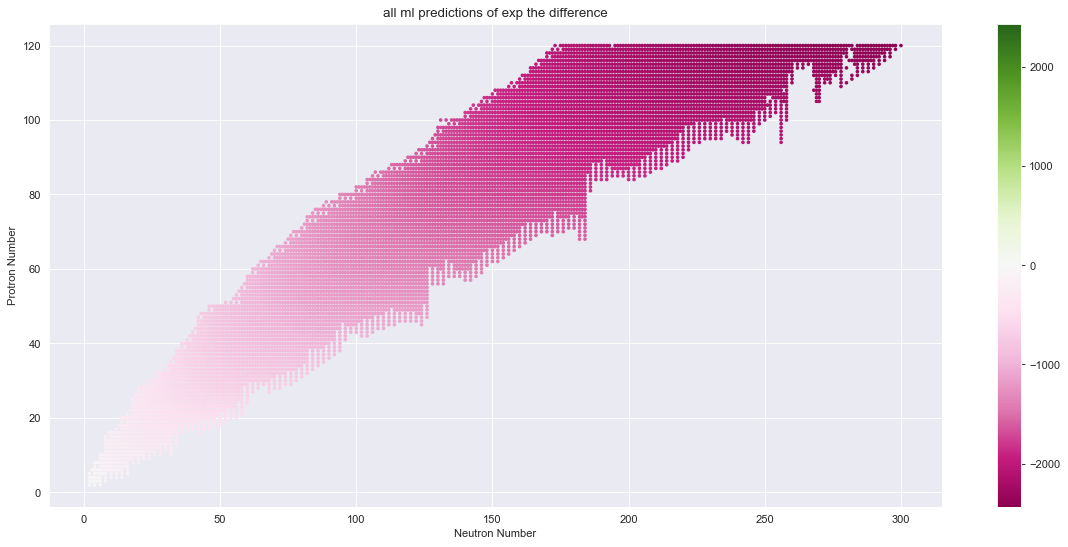

ValueError: cannot convert float NaN to integer

In [142]:
#theoretical importing relevent data
#Symbol Z  N A Binding_Energy_(MeV)  S_p_(MeV)  S_{2p}_(MeV) S_n_(MeV)  S_{2n}_(MeV) Q_{alpha}_(MeV)       
#0      1  2 3 4                     5          6            7          8            9

the_energies= [[],[], [], [], [], [],]

the_names   =['SKMS_all_nuclei-new-Copy1.dat',
              'SKP_all_nuclei-Copy1.dat',
              'SLY4_all_nuclei-new-Copy1.dat',
              'SV-MIN_all_nuclei-new-Copy1.dat',
              'UNEDF0_all_nuclei-new-Copy1.dat',
              'UNEDF1_all_nuclei-new-Copy1.dat']

#the_energies: Z,N,T_BE,Q,S_n,S_p

the_energies[0] = np.genfromtxt('SKMS_all_nuclei-new-Copy1.dat',usecols=(2,1,4,9,7,5))   
the_energies[1] = np.genfromtxt('SKP_all_nuclei-Copy1.dat',usecols=(2,1,4,9,7,5))
the_energies[2] = np.genfromtxt('SLY4_all_nuclei-new-Copy1.dat',usecols=(2,1,4,9,7,5))
the_energies[3] = np.genfromtxt('SV-MIN_all_nuclei-new-Copy1.dat',usecols=(2,1,4,9,7,5))
the_energies[4] = np.genfromtxt('UNEDF0_all_nuclei-new-Copy1.dat',usecols=(2,1,4,9,7,5))
the_energies[5] = np.genfromtxt('UNEDF1_all_nuclei-new-Copy1.dat',usecols=(2,1,4,9,7,5))

  
    


for i in range(0,6): 
    ext = np.int(np.ceil(max(-np.min(np.transpose(the_energies[i])[2]),np.max(np.transpose(the_energies[i])[2]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(the_energies[i])[0],np.transpose(the_energies[i])[1],c=np.transpose(the_energies[i])[2],cmap='PiYG',vmin=-ext,vmax=ext,s=5)
    plt.title('all ml predictions of exp the difference')
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.colorbar(sc)
    plt.show()
    ext = np.int(np.ceil(max(-np.min(np.transpose(the_energies[i])[3]),np.max(np.transpose(the_energies[i])[3]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(the_energies[i])[0],np.transpose(the_energies[i])[1],c=np.transpose(the_energies[i])[3],cmap='PiYG',vmin=-ext,vmax=ext,s=5)
    plt.title('all ml predictions of exp the difference')
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.colorbar(sc)
    plt.show()
    
    

for i in range(0,6):   
    the_energies[i]=np.transpose(the_energies[i])
    the_energies[i][2]=-the_energies[i][2]
    the_energies[i]=np.transpose(the_energies[i])
 
   

### removing all Theoretical nucei except those between z=20 and z=92 

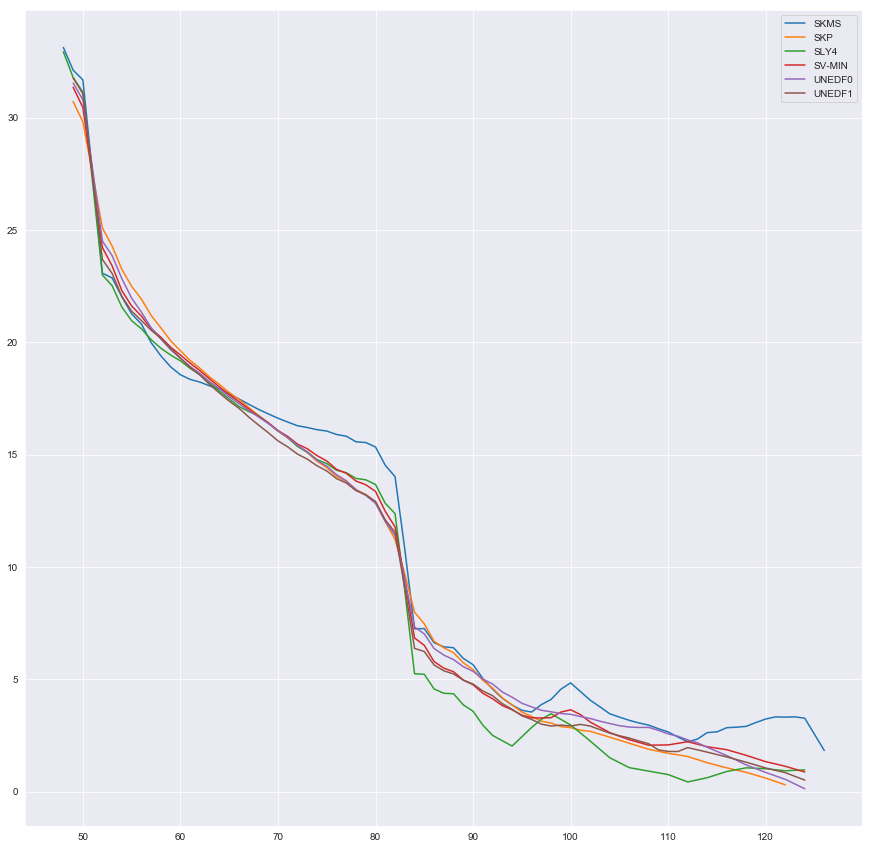

In [123]:
the_range     =[[],[],[],[],[],[],]
the_range_d   =[{},{},{},{},{},{},]

the_energies_d   =[{},{},{},{},{},{},]

    
for i in range(0,6):
    the_range[i] = the_energies[i][np.where(the_energies[i][:,1] >= 20)] #remove all nuclei with Z < 20

    
    the_range[i] = the_range[i][np.where(the_range[i][:,1] <= 92 )] #remove all nuclei with Z > 92
    the_range[i] = the_range[i][np.where(the_range[i][:,0] >= 20 )] #remove all nuclei with N < 20
    #the_range[i] = the_range[i][np.where(the_range[i][:,0] <= 240-92 )] #remove all nuclei with N > 240-92
    #remove all nuclei with Z < 20print(len(exp_range))



    
for i in range(0,6):
    
    for the_range_i in the_range[i]:
        #print(np.shape(the_range_i))
        the_range_d[i][the_range_i[0],the_range_i[1]]=the_range_i
        #print(the_range_d[i][the_range_i[0],the_range_i[1]])
        
for i in range(0,6):
    
    for the_energies_i in the_energies[i]:
        #print(np.shape(the_range_i))
        the_energies_d[i][the_energies_i[0],the_energies_i[1]]=the_energies_i
        #print(the_range_d[i][the_range_i[0],the_range_i[1]])
        
    
    
S_2n     =[[],[],[],[],[],[]]
NZ_S_2n  =[[],[],[],[],[],[]]

for i in range(0,6):
    for n in range(2,150):
        try:
            the_energies_d[i][n,50]
            the_energies_d[i][n-2,50]
            
            S_2n[i].append(the_energies_d[i][n,50][2]-the_energies_d[i][n-2,50][2])
            NZ_S_2n[i].append((n,50))
            
        except:
            continue
            
for i in range(0,6):
    #print(np.shape(S_2n[i]))
    #print(np.transpose(NZ_S_2n[i])[0][0])
    #print(np.transpose(NZ_S_2n[i])[0][-1])
    
    plt.plot(np.transpose(NZ_S_2n[i])[0],np.transpose(S_2n[i]), label=name[i])
plt.legend()
plt.show()




    

    

 # finding where theory and experimental nuclei match and don't match
    

In [124]:
the_exp_mat_energies=[[],[],[],[],[],[]]
the_exp_mat_energies_d=[{},{},{},{},{},{}]

the_exp_mat_range=[[],[],[],[],[],[]]
the_exp_mat_range_d=[{},{},{},{},{},{}]


for i in range(0,6):
    
    
    for exp_energies_i in exp_energies:  
        try:
            the_energies_d[i][exp_energies_i[0],exp_energies_i[1]]
            
            #the_energies: Z,N,T_BE,Q,S_n,S_p
            
            # Neutron, Proton, T_BE, E_BE, difference, Q, S_n, S_p
            the_exp_mat_energies[i].append((exp_energies_i[0],
                                            exp_energies_i[1],
                                            the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][2],
                                            exp_energies_i[2],
                                            the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][2]-exp_energies_i[2],
                                           the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][3],
                                           the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][4],
                                           the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][5]))
            
            the_exp_mat_energies_d[i][exp_energies_i[0],exp_energies_i[1]]=(exp_energies_i[0],
                                                                            exp_energies_i[1],
                                                                            the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][2],
                                                                            exp_energies_i[2],
                                                                            the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][2]-exp_energies_i[2],
                                                                           the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][3],
                                                                           the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][4],
                                                                           the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][5])
            
        except KeyError:
            continue
        

the_no_mat_energies=[[],[],[],[],[],[]]
for i in range(0,6):
    for the_energies_i in the_energies[i]:
        try:
            #print(the_energies_i[0])
            #print(the_energies_i[1])
            
            #print(the_energies_i)
            exp_energies_d[the_energies_i[0],the_energies_i[1]]
            
        except KeyError:
            the_no_mat_energies[i].append(the_energies_i)
            continue

the_no_mat_range=[[],[],[],[],[],[]]
for i in range(0,6):
    for the_range_i in the_range[i]:
        try:
            #print(the_energies_i[0])
            #print(the_energies_i[1])
            
            #print(the_energies_i)
            exp_range_d[the_range_i[0],the_range_i[1]]
            
        except KeyError:
            the_no_mat_range[i].append(the_range_i)
            continue

        
            
            
    
    for exp_range_i in exp_range:  
        try:
            the_range_d[i][exp_range_i[0],exp_range_i[1]]
            
            
            # Neutron, Proton, Theoretical BE, Experimental BE, difference
            the_exp_mat_range[i].append((exp_range_i[0],
                                            exp_range_i[1],
                                            the_range_d[i][exp_range_i[0],exp_range_i[1]][2],
                                            exp_range_i[2],
                                            the_range_d[i][exp_range_i[0],exp_range_i[1]][2]-exp_range_i[2],
                                        the_range_d[i][exp_range_i[0],exp_range_i[1]][3],
                                        the_range_d[i][exp_range_i[0],exp_range_i[1]][4],
                                        the_range_d[i][exp_range_i[0],exp_range_i[1]][5]))
            
            the_exp_mat_range_d[i][exp_range_i[0],exp_range_i[1]]=(exp_range_i[0],
                                                                            exp_range_i[1],
                                                                            the_range_d[i][exp_range_i[0],exp_range_i[1]][2],
                                                                            exp_range_i[2],
                                                                            the_range_d[i][exp_range_i[0],exp_range_i[1]][2]-exp_range_i[2],
                                                                  the_range_d[i][exp_range_i[0],exp_range_i[1]][3],
                                                                  the_range_d[i][exp_range_i[0],exp_range_i[1]][4],
                                                                  the_range_d[i][exp_range_i[0],exp_range_i[1]][5])
            
        except KeyError:
            continue
            

            


# Creating the ndrip region 

In [125]:

ndrip_range=[[],[],[],[],[],[]]
ndrip_range_d=[[],[],[],[],[],[]]
zdrip_range=[[],[],[],[],[],[]]
the_exp_mat_reduced_range=[[],[],[],[],[],[]]



for i in range(0,6):
    #print(np.shape(the_exp_mat_range[i]))
    #print(the_exp_mat_range[i][0][1])
    #print(len(the_exp_mat_range[i]))
    #print(the_exp_mat_range[i][0], "\n")
    
    for j in range(1, len(the_exp_mat_range[i])):
        if the_exp_mat_range[i][j-1][1] != the_exp_mat_range[i][j][1]:
            ndrip_range[i].append(the_exp_mat_range[i][j-1])
            ndrip_range[i].append(the_exp_mat_range[i][j-2])
            ndrip_range[i].append(the_exp_mat_range[i][j-3])
            zdrip_range[i].append(the_exp_mat_range[i][j])
            
            
    ndrip_range[i].append(the_exp_mat_range[i][len(the_exp_mat_range[i])-1])
    ndrip_range[i].append(the_exp_mat_range[i][len(the_exp_mat_range[i])-2])
    ndrip_range[i].append(the_exp_mat_range[i][len(the_exp_mat_range[i])-3])
    zdrip_range[i].append(the_exp_mat_range[i][0])
        
    
    for j in range(1, len(the_exp_mat_range[i])):
        if the_exp_mat_range[i][j-3][1] != the_exp_mat_range[i][j][1]:
            x=1
        else:
            the_exp_mat_reduced_range[i].append(the_exp_mat_range[i][j-3])
        
    

ndrip_energies=[[],[],[],[],[],[]]
ndrip_energies_d=[[],[],[],[],[],[]]
zdrip_energies=[[],[],[],[],[],[]]
the_exp_mat_reduced_energies=[[],[],[],[],[],[]]



for i in range(0,6):
    #print(np.shape(the_exp_mat_range[i]))
    #print(the_exp_mat_range[i][0][1])
    #print(len(the_exp_mat_range[i]))
    #print(the_exp_mat_range[i][0], "\n")
    
    for j in range(1, len(the_exp_mat_energies[i])):
        if the_exp_mat_energies[i][j-1][1] != the_exp_mat_energies[i][j][1]:
            ndrip_energies[i].append(the_exp_mat_energies[i][j-1])
            ndrip_energies[i].append(the_exp_mat_energies[i][j-2])
            ndrip_energies[i].append(the_exp_mat_energies[i][j-3])
            zdrip_energies[i].append(the_exp_mat_energies[i][j])
            
            
    ndrip_energies[i].append(the_exp_mat_energies[i][len(the_exp_mat_energies[i])-1])
    ndrip_energies[i].append(the_exp_mat_energies[i][len(the_exp_mat_energies[i])-2])
    ndrip_energies[i].append(the_exp_mat_energies[i][len(the_exp_mat_energies[i])-3])
    zdrip_energies[i].append(the_exp_mat_energies[i][0])
        
    
    for j in range(1, len(the_exp_mat_energies[i])):
        if the_exp_mat_energies[i][j-3][1] != the_exp_mat_energies[i][j][1]:
            x=1
        else:
            the_exp_mat_reduced_energies[i].append(the_exp_mat_energies[i][j-3])
        
    

    

# Creating energies with no nan values

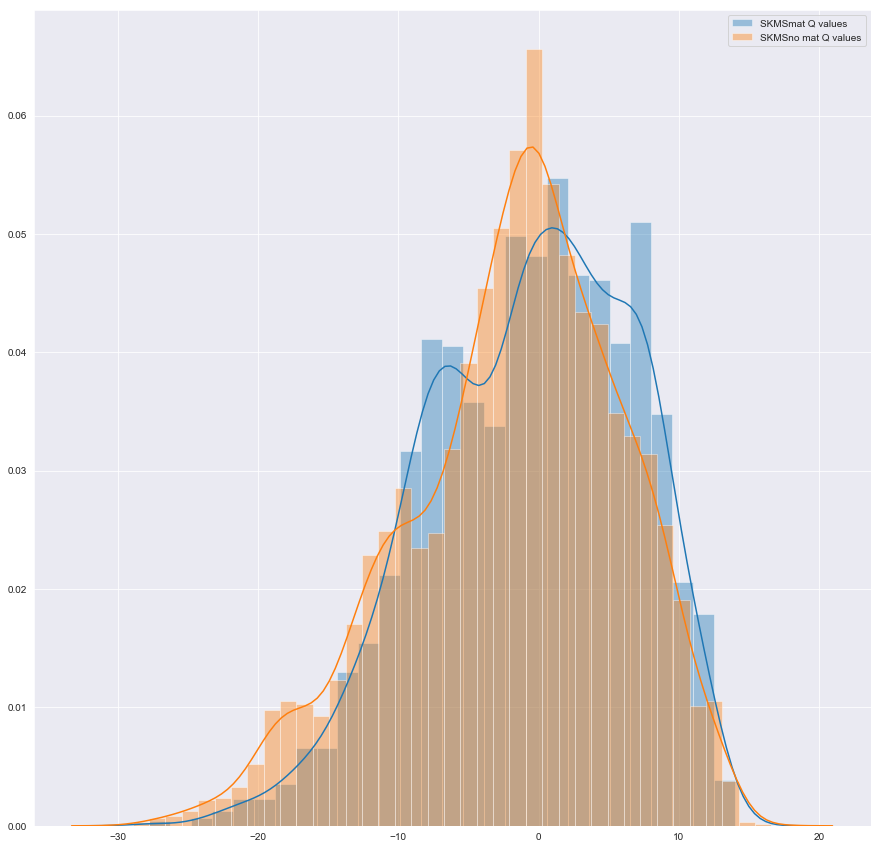

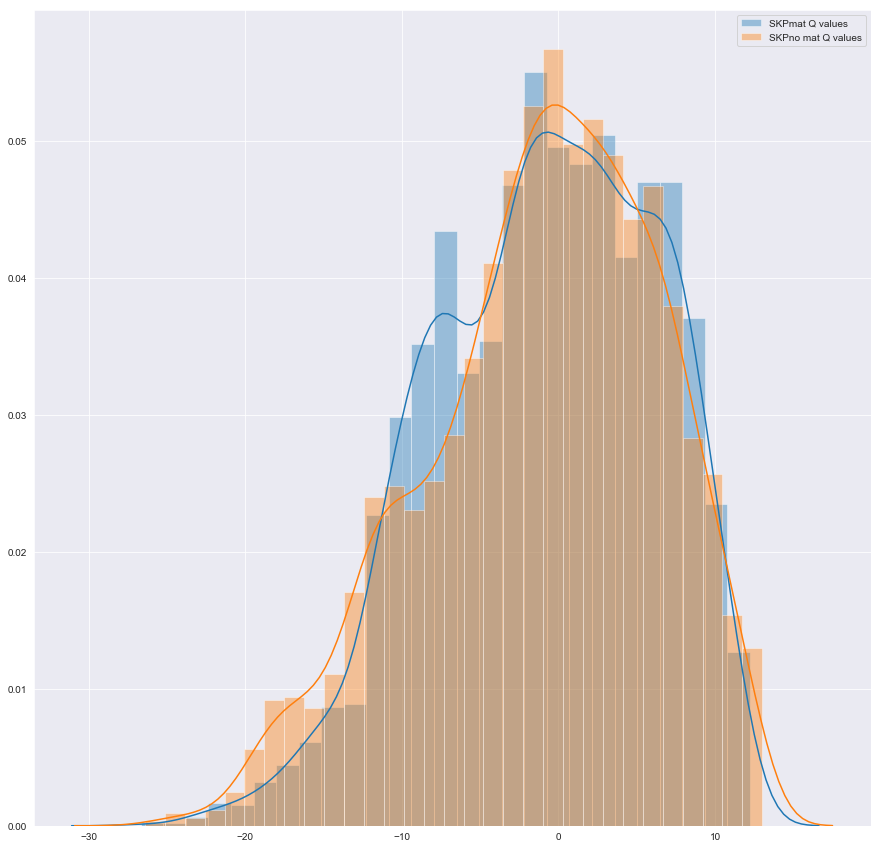

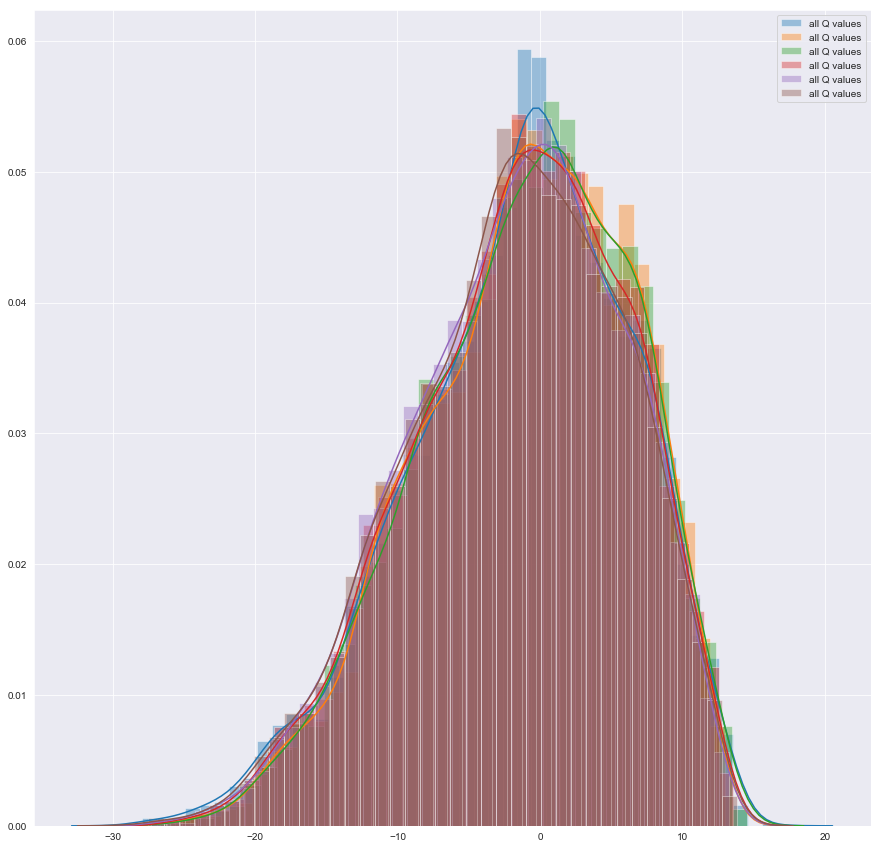

'\nfor i in range(0,6):\n    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n    #zdrip_nonan_energies[i]=np.transpose(zdrip_energies[i])\n    #ndrip_nonan_energies[i]=np.transpose(ndrip_energies[i])\n    \n    #the_exp_mat_nonan_energies[i]=np.transpose(the_exp_mat_energies[i]) \n    #the_exp_mat_reduced_nonan_energies[i]=np.transpose(the_exp_mat_reduced_energies[i])    \n    #the_no_mat_nonan_energies[i]=np.transpose(the_no_mat_energies[i])\n    \n    #the_nonan_energies[i]=np.transpose(the_nonan_energies[i])\n    \n    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n    \n    print(np.shape(zdrip_nonan_energies[i]))\n    print(np.shape(ndrip_nonan_energies[i]))\n    print(np.shape(the_exp_mat_nonan_energies[i]))\n    print(np.shape(the_exp_mat_reduced_nonan_energies[i]))\n    print(np.shape(the_no_mat_nonan_energies[i]))\n    print(np.sh

In [126]:
zdrip_nonan_energies                     =[[],[],[],[],[],[]]
ndrip_nonan_energies                     =[[],[],[],[],[],[]]
the_exp_mat_reduced_nonan_energies       =[[],[],[],[],[],[]]
the_exp_mat_nonan_energies               =[[],[],[],[],[],[]]
the_no_mat_nonan_energies                =[[],[],[],[],[],[]]
the_nonan_energies                       =[[],[],[],[],[],[]]




for i in range(0,6):
    for the_energies_i in the_energies[i]:
        if math.isnan(the_energies_i[0]) or math.isnan(the_energies_i[2]) or math.isnan(the_energies_i[3]) or math.isnan(the_energies_i[4]) or math.isnan(the_energies_i[5]):
           x=1
            #print(the_exp_mat_reduced_energies_i)
            
        else:
            the_nonan_energies[i].append(the_energies_i)
       


for i in range(0,6):
    for the_exp_mat_reduced_energies_i in the_exp_mat_reduced_energies[i]:
        if math.isnan(the_exp_mat_reduced_energies_i[0]) or math.isnan(the_exp_mat_reduced_energies_i[2]) or math.isnan(the_exp_mat_reduced_energies_i[3]) or math.isnan(the_exp_mat_reduced_energies_i[4]) or math.isnan(the_exp_mat_reduced_energies_i[5]) or math.isnan(the_exp_mat_reduced_energies_i[6]) or math.isnan(the_exp_mat_reduced_energies_i[7]):
           x=1
            #print(the_exp_mat_reduced_energies_i)
            
        else:
            the_exp_mat_reduced_nonan_energies[i].append(the_exp_mat_reduced_energies_i)
            
            

for i in range(0,6):
    for the_exp_mat_energies_i in the_exp_mat_energies[i]:
        if math.isnan(the_exp_mat_energies_i[0]) or math.isnan(the_exp_mat_energies_i[2]) or math.isnan(the_exp_mat_energies_i[3]) or math.isnan(the_exp_mat_energies_i[4]) or math.isnan(the_exp_mat_energies_i[5]) or math.isnan(the_exp_mat_energies_i[6]) or math.isnan(the_exp_mat_energies_i[7]):
            x=1
            #print(the_exp_mat_reduced_energies_i)
            
        else:
            the_exp_mat_nonan_energies[i].append(the_exp_mat_energies_i)
            
            

for i in range(0,6):
    for the_no_mat_energies_i in the_no_mat_energies[i]:
        if math.isnan(the_no_mat_energies_i[0]) or math.isnan(the_no_mat_energies_i[2]) or math.isnan(the_no_mat_energies_i[3]) or math.isnan(the_no_mat_energies_i[4]) or math.isnan(the_no_mat_energies_i[5]):
            x=1
            #print(the_exp_mat_reduced_energies_i)
            
        else:
            the_no_mat_nonan_energies[i].append(the_no_mat_energies_i)
            
for i in range(0,6):
    for ndrip_energies_i in ndrip_energies[i]:
        if math.isnan(ndrip_energies_i[0]) or math.isnan(ndrip_energies_i[2]) or math.isnan(ndrip_energies_i[3]) or math.isnan(ndrip_energies_i[4]) or math.isnan(ndrip_energies_i[5]) or math.isnan(ndrip_energies_i[6]) or math.isnan(ndrip_energies_i[7]):
           x=1
            #print(the_exp_mat_reduced_energies_i)
            
        else:
            ndrip_nonan_energies[i].append(ndrip_energies_i)
            
 
for i in range(0,6):
    for zdrip_energies_i in zdrip_energies[i]:
        if math.isnan(zdrip_energies_i[0]) or math.isnan(zdrip_energies_i[2]) or math.isnan(zdrip_energies_i[3]) or math.isnan(zdrip_energies_i[4]) or math.isnan(zdrip_energies_i[5]) or math.isnan(zdrip_energies_i[6]) or math.isnan(zdrip_energies_i[7]):
           x=1
            #print(the_exp_mat_reduced_energies_i)
            
        else:
            zdrip_nonan_energies[i].append(zdrip_energies_i)
            
 

############################################
############################################
############################################

"""
            
for i in range(0,6):
    print("the: ", np.shape(the_energies[i]))
    print("the: ", np.shape(the_nonan_energies[i]), "\n")
    
    
    print("the_exp_mat_reduced: ", np.shape(the_exp_mat_reduced_energies[i]))
    print("the_exp_mat_reduced: ", np.shape(the_exp_mat_reduced_nonan_energies[i]), "\n")
    
    
    print("the_exp_mat: ", np.shape(the_exp_mat_energies[i]))
    print("the_exp_mat: ", np.shape(the_exp_mat_nonan_energies[i]), "\n")
    
    
    print("the_no_mat: ", np.shape(the_no_mat_energies[i]))
    print("the_no_mat: ", np.shape(the_no_mat_nonan_energies[i]), "\n")
            
    print("ndrip: ", np.shape(ndrip_energies[i]))
    print("ndrip: ", np.shape(ndrip_nonan_energies[i]), "\n")
            
    print("zdrip: ", np.shape(zdrip_energies[i]))
    print("zdrip: ", np.shape(zdrip_nonan_energies[i]), "\n")
"""

for i in range(0,1):
    sns.set_style('darkgrid')
    #sns.distplot(np.transpose(the_exp_mat_reduced_nonan_energies[i])[5], label='reduced mat Q values')
    sns.distplot(np.transpose(the_exp_mat_nonan_energies[i])[5], label=name[i]+'mat Q values')
    sns.distplot(np.transpose(the_no_mat_nonan_energies[i])[3], label=name[i]+'no mat Q values')

plt.legend()
plt.show()
 


for i in range(1,2):
    sns.set_style('darkgrid')
    #sns.distplot(np.transpose(the_exp_mat_reduced_nonan_energies[i])[5], label='reduced mat Q values')
    sns.distplot(np.transpose(the_exp_mat_nonan_energies[i])[5], label=name[i]+'mat Q values')
    sns.distplot(np.transpose(the_no_mat_nonan_energies[i])[3], label=name[i]+'no mat Q values')

plt.legend()
plt.show()

 
for i in range(0,6):
    sns.set_style('darkgrid')
    sns.distplot(np.transpose(the_nonan_energies[i])[3], label='all Q values')
    plt.legend()
plt.show()
 


"""
for i in range(0,6):
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #zdrip_nonan_energies[i]=np.transpose(zdrip_energies[i])
    #ndrip_nonan_energies[i]=np.transpose(ndrip_energies[i])
    
    #the_exp_mat_nonan_energies[i]=np.transpose(the_exp_mat_energies[i]) 
    #the_exp_mat_reduced_nonan_energies[i]=np.transpose(the_exp_mat_reduced_energies[i])    
    #the_no_mat_nonan_energies[i]=np.transpose(the_no_mat_energies[i])
    
    #the_nonan_energies[i]=np.transpose(the_nonan_energies[i])
    
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
    print(np.shape(zdrip_nonan_energies[i]))
    print(np.shape(ndrip_nonan_energies[i]))
    print(np.shape(the_exp_mat_nonan_energies[i]))
    print(np.shape(the_exp_mat_reduced_nonan_energies[i]))
    print(np.shape(the_no_mat_nonan_energies[i]))
    print(np.shape(the_nonan_energies[i]))
    
    print(np.shape(zdrip_range[i]))
    print(np.shape(ndrip_range[i]))
    print(np.shape(the_exp_mat_range[i]))
    print(np.shape(the_exp_mat_reduced_range[i]))
    print(np.shape(the_no_mat_range[i]))
    print(np.shape(the_range[i]))
    
"""



        

        
        

   

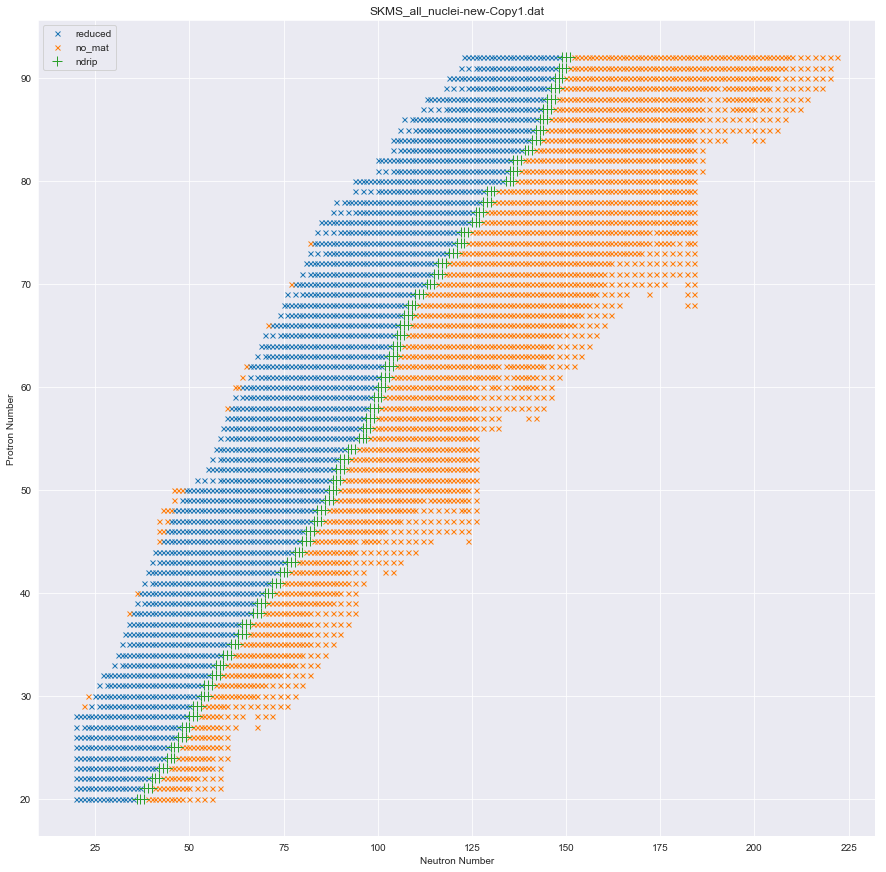

(8, 2919)
(6, 5430)
(8, 351)


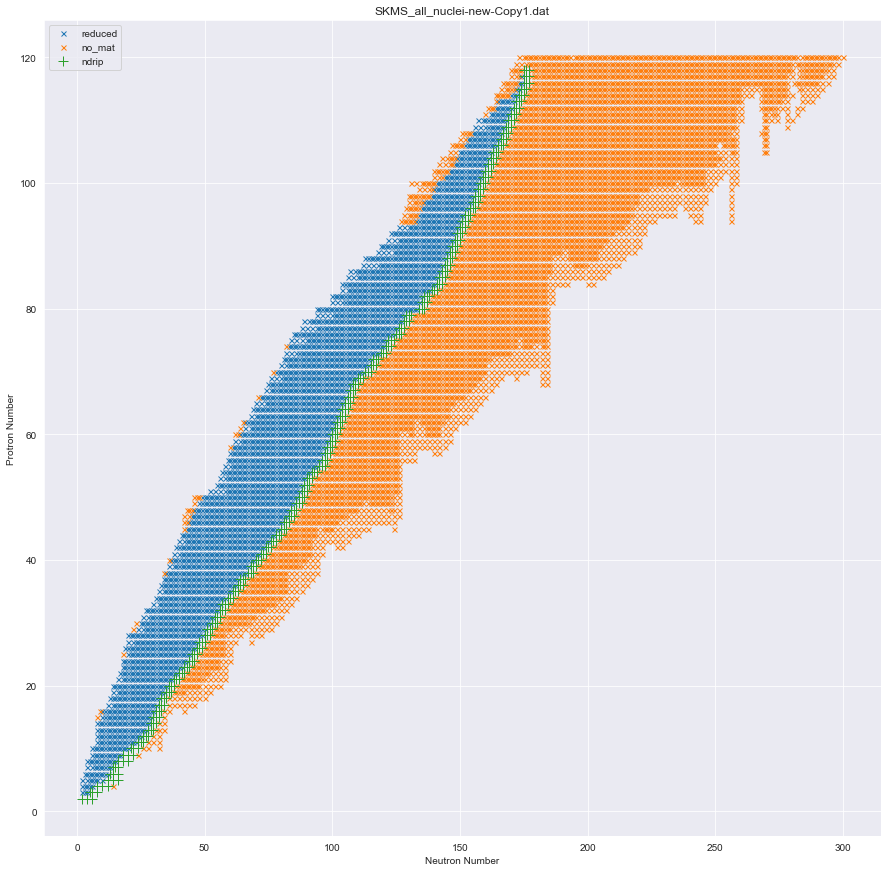

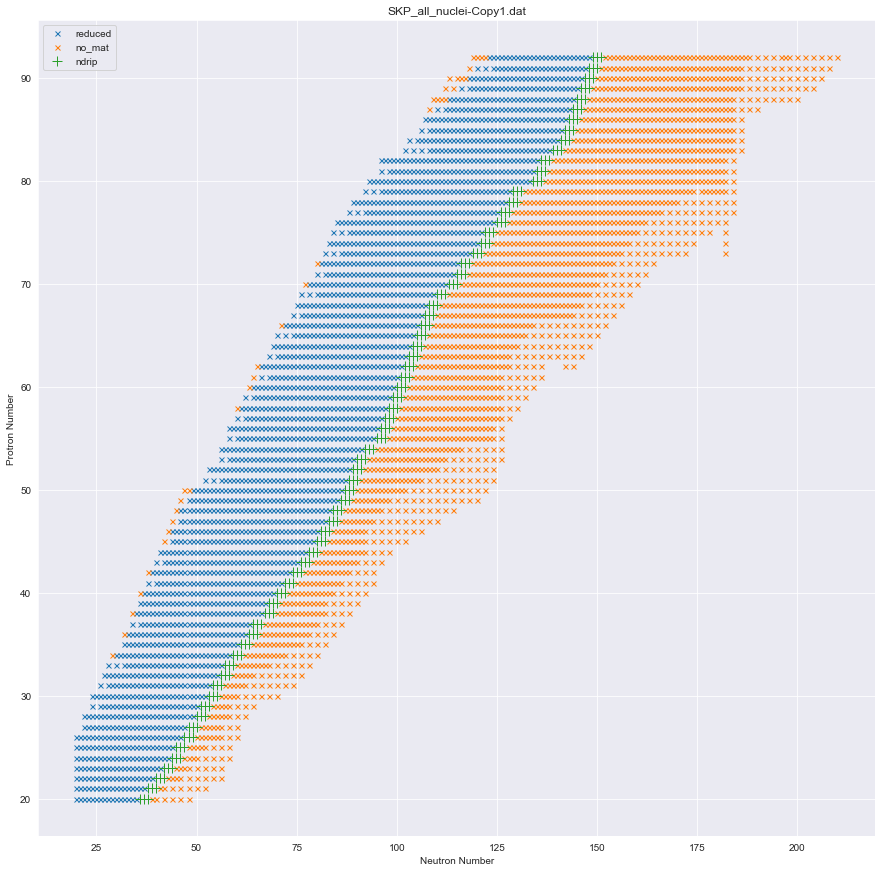

(8, 2939)
(6, 4188)
(8, 351)


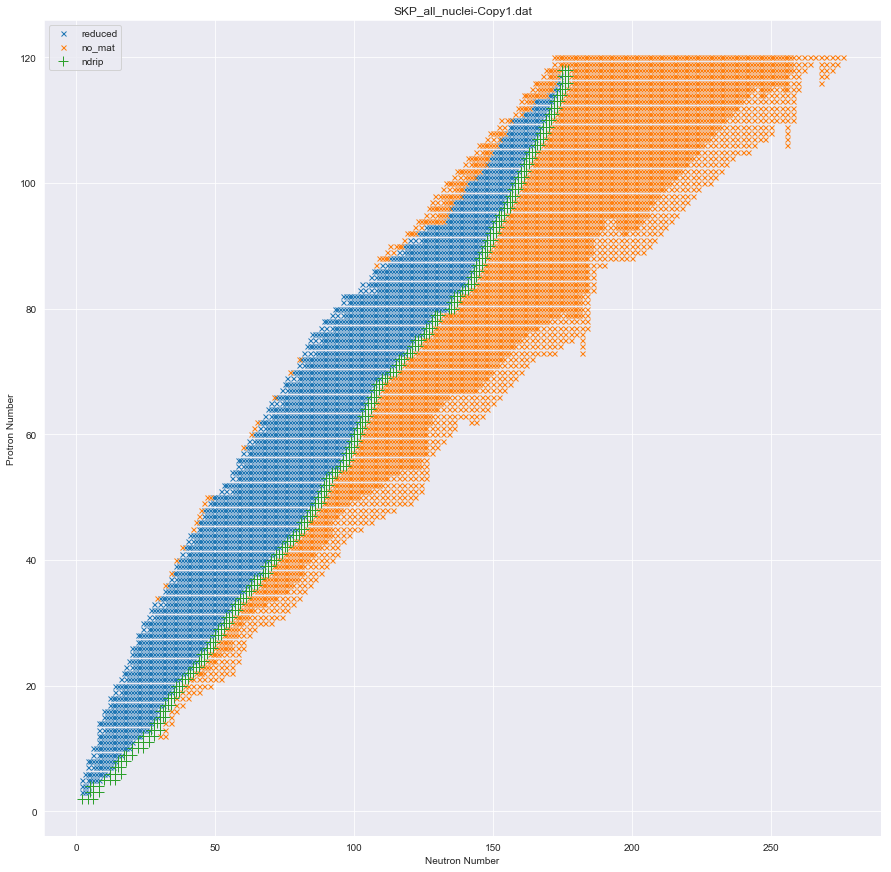

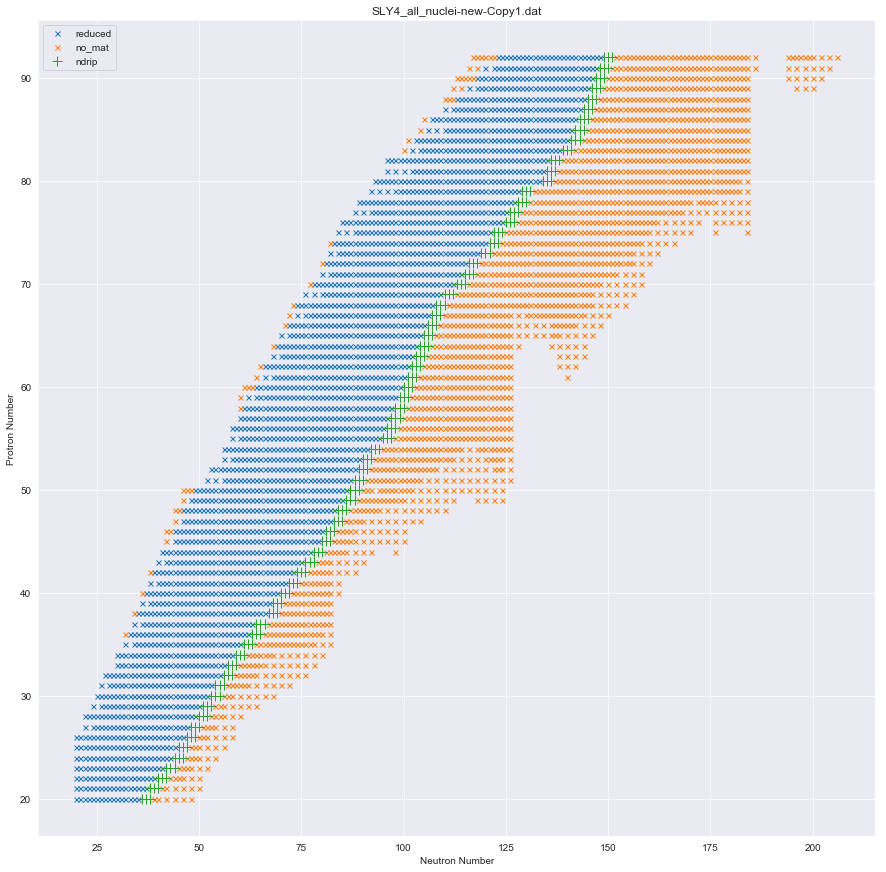

(8, 2927)
(6, 3986)
(8, 351)


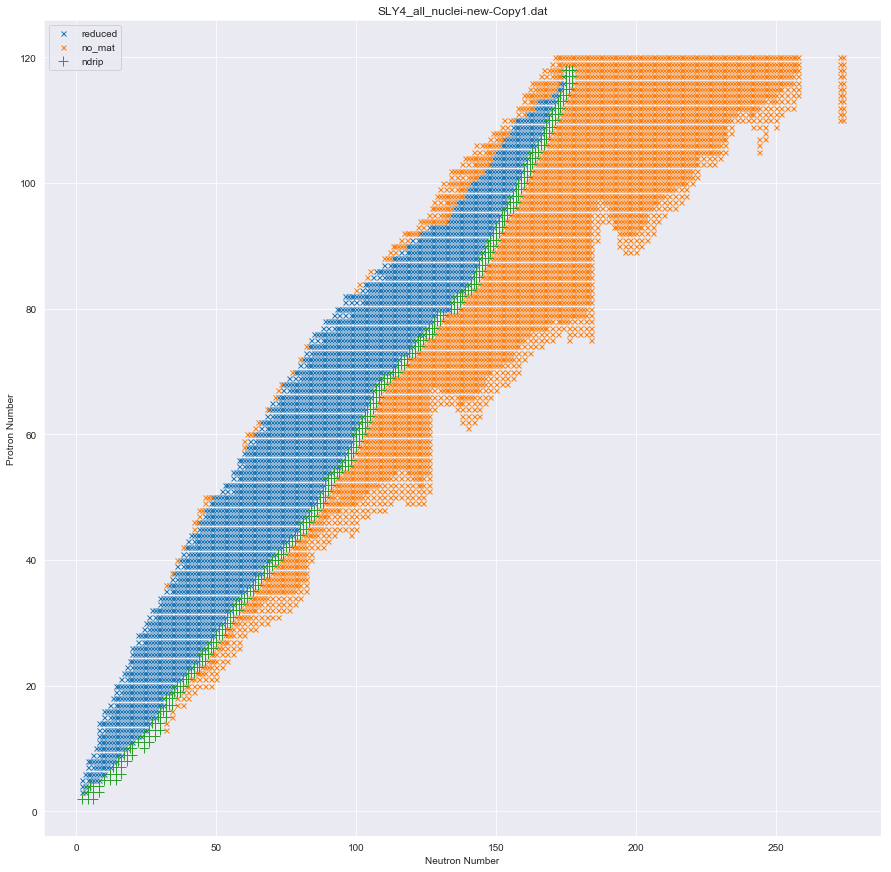

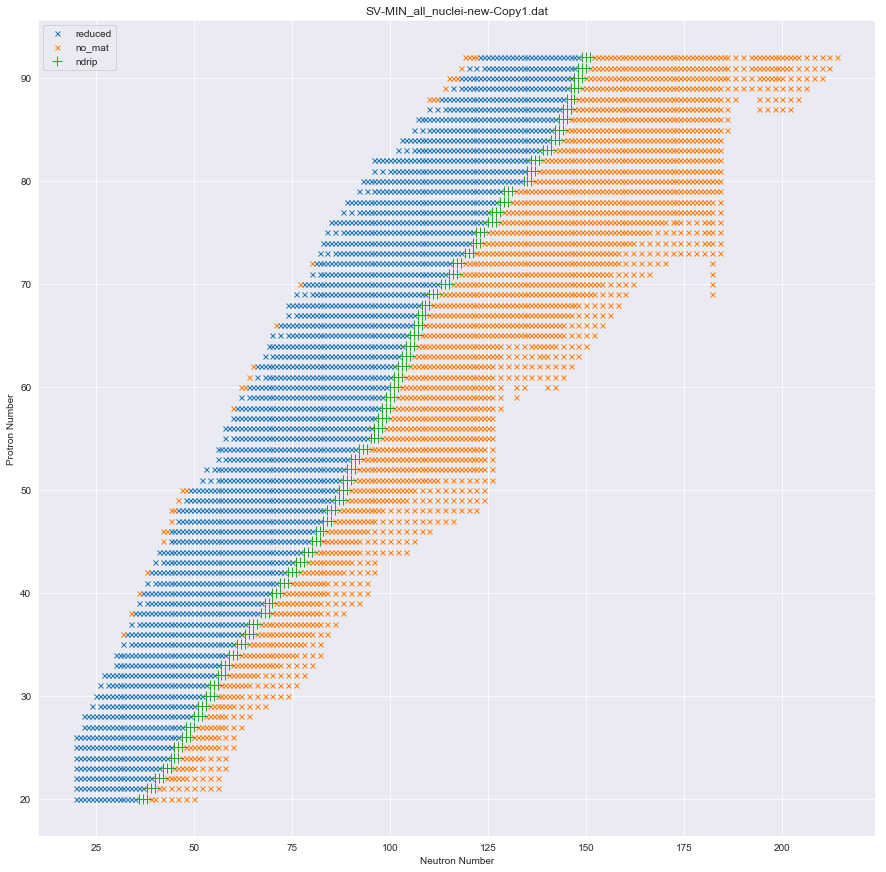

(8, 2941)
(6, 4632)
(8, 351)


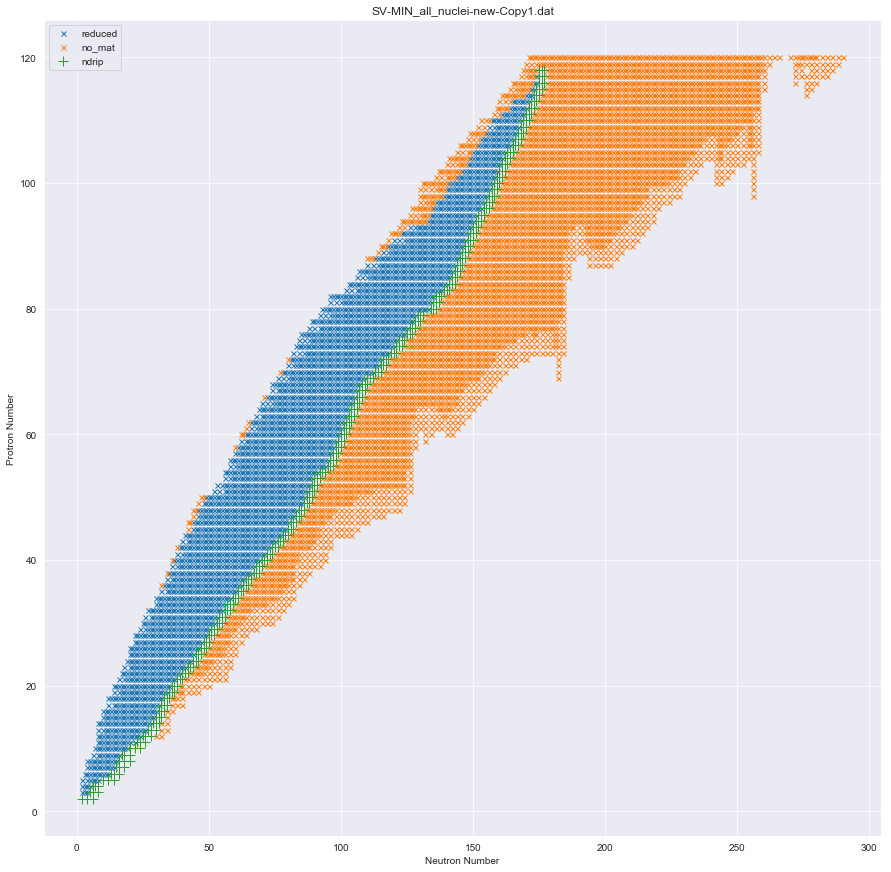

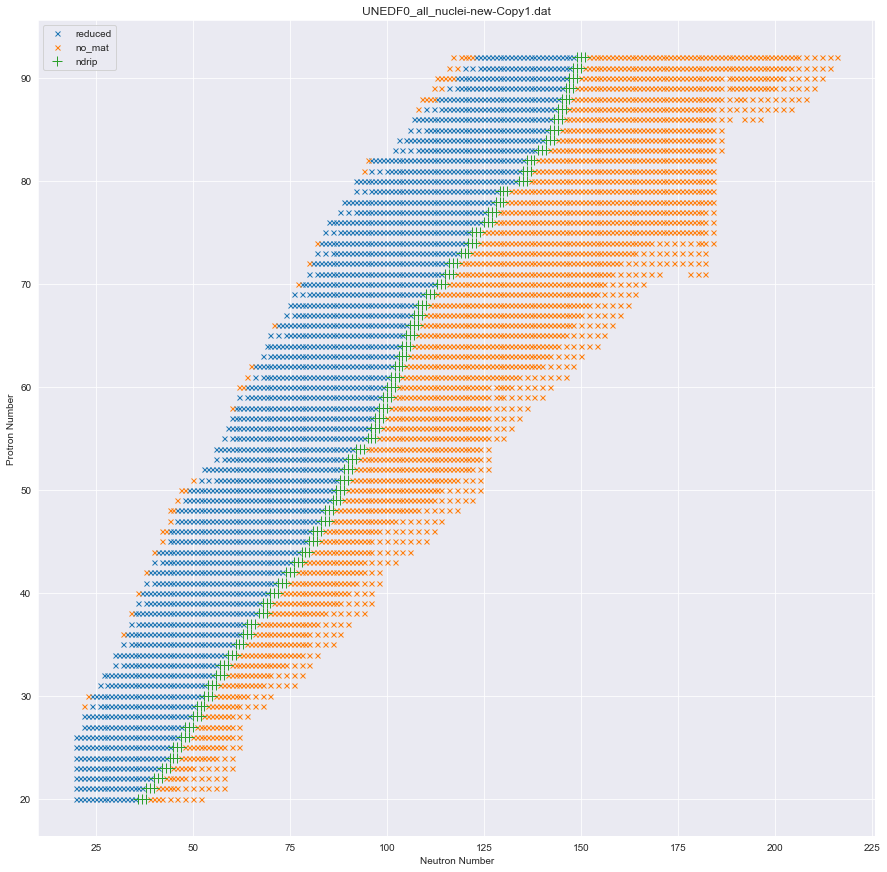

(8, 2939)
(6, 5010)
(8, 351)


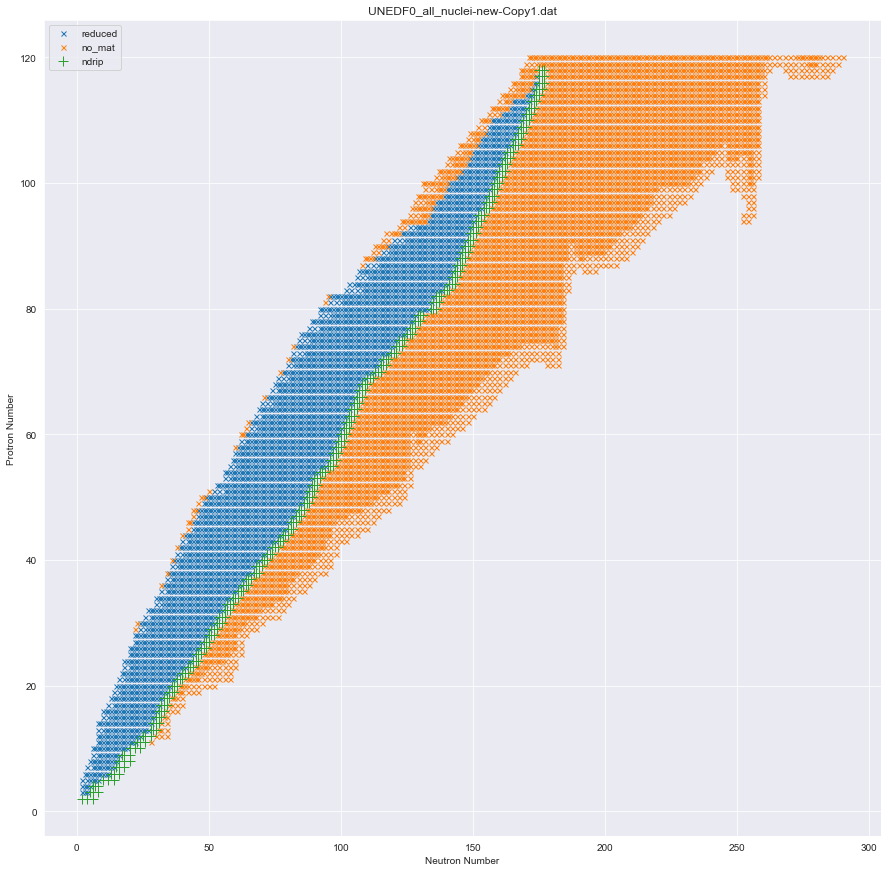

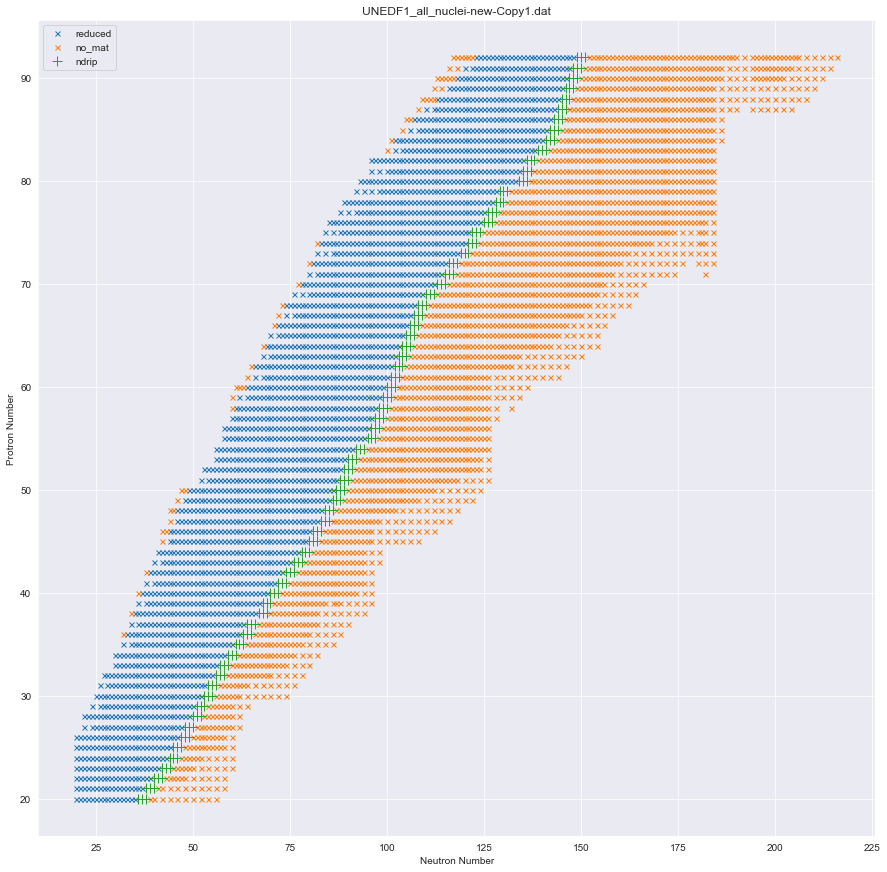

(8, 2949)
(6, 5024)
(8, 351)


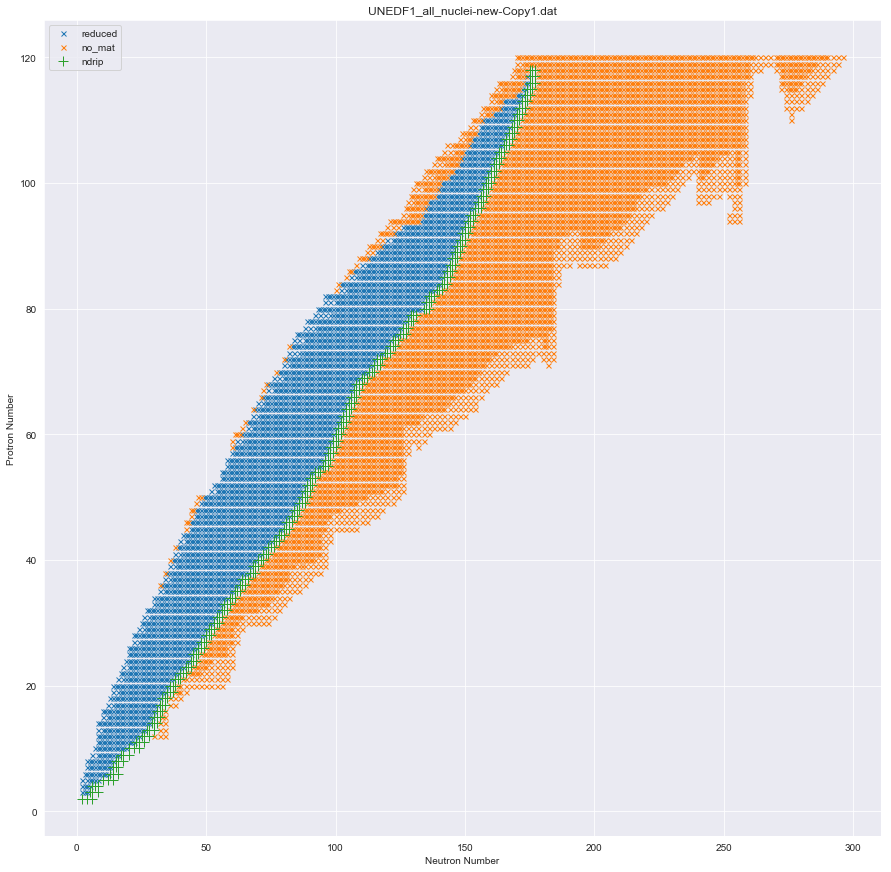

In [127]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#GRAPHS
#GRAPHS
#GRAPHS
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$



for i in range(0,6):
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    zdrip_range[i]=np.transpose(zdrip_range[i])
    ndrip_range[i]=np.transpose(ndrip_range[i])
    the_exp_mat_range[i]=np.transpose(the_exp_mat_range[i]) 
    the_exp_mat_reduced_range[i]=np.transpose(the_exp_mat_reduced_range[i])    
    the_no_mat_range[i]=np.transpose(the_no_mat_range[i])
    
    the_range[i]=np.transpose(the_range[i])
    the_energies[i]=np.transpose(the_energies[i])
    
    
    zdrip_energies[i]=np.transpose(zdrip_energies[i])
    ndrip_energies[i]=np.transpose(ndrip_energies[i])
    the_exp_mat_energies[i]=np.transpose(the_exp_mat_energies[i]) 
    the_exp_mat_reduced_energies[i]=np.transpose(the_exp_mat_reduced_energies[i])    
    the_no_mat_energies[i]=np.transpose(the_no_mat_energies[i])
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    


for i in range(0,6):


    #plt.plot(the_exp_mat_range[i][0],the_exp_mat_range[i][1], "x", markersize=5, label='all')
    plt.plot(the_exp_mat_reduced_range[i][0],the_exp_mat_reduced_range[i][1], "x", markersize=5, label='reduced')
    plt.plot(the_no_mat_range[i][0],the_no_mat_range[i][1], "x", markersize=5, label='no_mat')
    #plt.plot(zdrip_range[i][0],zdrip_range[i][1], "+", markersize=10, label='zdrip')
    plt.plot(ndrip_range[i][0],ndrip_range[i][1], "+", markersize=10, label='ndrip')
    plt.title(the_names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    print(np.shape(the_exp_mat_reduced_energies[i]))
    print(np.shape(the_no_mat_energies[i]))
    print(np.shape(ndrip_energies[i]))
    
    #plt.plot(the_exp_mat_range[i][0],the_exp_mat_range[i][1], "x", markersize=5, label='all')
    plt.plot(the_exp_mat_reduced_energies[i][0],the_exp_mat_reduced_energies[i][1], "x", markersize=5, label='reduced')
    plt.plot(the_no_mat_energies[i][0],the_no_mat_energies[i][1], "x", markersize=5, label='no_mat')
    #plt.plot(zdrip_energies[i][0],zdrip_energies[i][1], "+", markersize=10, label='zdrip')
    plt.plot(ndrip_energies[i][0],ndrip_energies[i][1], "+", markersize=10, label='ndrip')
    plt.title(the_names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    
for i in range(0,6):
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    zdrip_range[i]=np.transpose(zdrip_range[i])    
    ndrip_range[i]=np.transpose(ndrip_range[i]) 
    the_exp_mat_range[i]=np.transpose(the_exp_mat_range[i])
    the_exp_mat_reduced_range[i]=np.transpose(the_exp_mat_reduced_range[i])  
    the_no_mat_range[i]=np.transpose(the_no_mat_range[i])
    
    the_range[i]=np.transpose(the_range[i])
    the_energies[i]=np.transpose(the_energies[i])
    
    
    zdrip_energies[i]=np.transpose(zdrip_energies[i])
    ndrip_energies[i]=np.transpose(ndrip_energies[i])
    the_exp_mat_energies[i]=np.transpose(the_exp_mat_energies[i]) 
    the_exp_mat_reduced_energies[i]=np.transpose(the_exp_mat_reduced_energies[i])    
    the_no_mat_energies[i]=np.transpose(the_no_mat_energies[i])
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    

    

# Applying the random Forest


fuction objectives:

train an rf object

return the training and testing score
return the training and testing mean squared error

if there is an ndrip zone return the score and mean squared error of the ndrip zone

for all nuclei with theoretical values use the rf to predict difference add it to the value







In [128]:
name=["SKMS",
      "SKP",
      "SLY4",
      "SV-MIN",
      "UNEDF0",
      "UNEDF1"]

# Neutron, Proton, Theoretical BE, Experimental BE, difference, Q
#   0,        1,       2,               3,               4,      5   

             #  1          2    3   4               5             6         7                 8               9           10                   11                 12  
def ml_predict(features, target,NZ, ndrip_features, ndrip_target, ndrip_NZ, all_the_features, all_the_values, all_the_NZ, body_ndrip_features, body_ndrip_targets, body_ndrip_NZ):
    """
    print("features:         ", np.shape(features))
    print("target:           ", np.shape(target))
    print("ndrip_features:   ", np.shape(ndrip_features))
    print("ndrip_target:     ", np.shape(ndrip_target))
    print("all_the_features: ", np.shape(all_the_features))
    print("all_the_values:   ", np.shape(all_the_values))
    """
    
    

    rf_object=RandomForestRegressor(n_estimators=1000)#, bootstrap=False,)
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size =0.25, random_state=42 )
    
 
    rf_object.fit(X_train,y_train)
    
    
    
    
    
    train_predictions         =  rf_object.predict(X_train)
    test_predictions          =  rf_object.predict(X_test)
    body_predictions          =  rf_object.predict(features)
    ndrip_predictions         =  rf_object.predict(ndrip_features)
    body_ndrip_predictions    =  rf_object.predict(body_ndrip_features)
    all_the_predictions       =  rf_object.predict(all_the_features)
    
    
    #body_ndrip_ml_error       =  body_ndrip_predictions-body_ndrip_targets
    
    
    
    
    print("training score: ",    rf_object.score(X_train,y_train))
    print("testing score:  ",    rf_object.score(X_test,y_test))
    print("full score:     ",    rf_object.score(features,target))
    print("ndrip score:     ",   rf_object.score(ndrip_features, ndrip_target), "\n")
    
    print("train sqrd mean sqrd error:      ", np.sqrt(mean_squared_error(train_predictions,y_train)))
    print("test sqrd mean sqrd error:       ", np.sqrt(mean_squared_error(test_predictions,y_test)))
    print("all body sqrd mean sqrd error:   ", np.sqrt(mean_squared_error(body_predictions,target)))
    print("ndrip sqrd mean sqrd error:      ", np.sqrt(mean_squared_error(ndrip_predictions,ndrip_target)), "\n\n\n")
    
    """
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    ext = np.int(np.ceil(max(-np.min(body_ndrip_predictions),np.max(body_ndrip_predictions))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(body_ndrip_NZ)[0],np.transpose(body_ndrip_NZ)[1],c=body_ndrip_predictions,cmap='PiYG',vmin=-ext,vmax=ext,s=5)
    plt.title('predictions')
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.colorbar(sc)
    plt.show()
    
    ext = np.int(np.ceil(max(-np.min(body_ndrip_ml_error),np.max(body_ndrip_ml_error))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(body_ndrip_NZ)[0],np.transpose(body_ndrip_NZ)[1],c=body_ndrip_ml_error,cmap='PiYG',vmin=-ext,vmax=ext,s=5)
    plt.title('predictions-target')
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.colorbar(sc)
    plt.show()
    
    
    ext = np.int(np.ceil(max(-np.min(all_the_predictions),np.max(all_the_predictions))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(all_the_NZ)[0],np.transpose(all_the_NZ)[1],c=all_the_predictions,cmap='PiYG',vmin=-ext,vmax=ext,s=5)
    plt.title('all ml predictions of exp the difference')
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.colorbar(sc)
    plt.show()
    
    """
    
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
    
    
    
    return all_the_predictions     #improved_values


    

def t_be_improve(features, target,NZ, ndrip_features, ndrip_target, ndrip_NZ, all_the_features, all_the_values, all_the_NZ, body_ndrip_features, body_ndrip_targets, body_ndrip_NZ):
    
    ml_comp=ml_predict(features, target,NZ, ndrip_features, ndrip_target, ndrip_NZ, all_the_features, all_the_values, all_the_NZ, body_ndrip_features, body_ndrip_targets, body_ndrip_NZ)
    """
    ext = np.int(np.ceil(max(-np.min(ml_comp+all_the_values),np.max(ml_comp+all_the_values))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(all_the_NZ)[0],np.transpose(all_the_NZ)[1],c=ml_comp+all_the_values,cmap='PiYG',vmin=-ext,vmax=ext,s=5)
    plt.plot(np.transpose(body_ndrip_NZ)[0],np.transpose(body_ndrip_NZ)[1], 'x', markersize=2)
    plt.title('all ml predictions of exp the difference')
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.colorbar(sc)
    plt.show()
    """
    #sub=[]
    #for j in range(0,len(ml_comp)):
    #        sub.append(all_the_values[j]-ml_comp[j])
    ml_comp=pd.DataFrame(ml_comp)
    all_the_values=all_the_values-ml_comp
    
    return all_the_values

    
  


     
 

In [52]:
rf_ZQ_name=["rf_ZQ_SKMS",
         "rf_ZQ_SKP",
         "rf_ZQ_SLY4",
         "rf_ZQ_SV-MIN",
         "rf_ZQ_UNEDF0",
         "rf_ZQ_UNEDF1",]


for i in range(0,6):
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    zdrip_range[i]=np.transpose(zdrip_range[i])
    ndrip_range[i]=np.transpose(ndrip_range[i])
    the_exp_mat_range[i]=np.transpose(the_exp_mat_range[i]) 
    the_exp_mat_reduced_range[i]=np.transpose(the_exp_mat_reduced_range[i])    
    the_no_mat_range[i]=np.transpose(the_no_mat_range[i])
    the_range[i]=np.transpose(the_range[i])
    the_energies[i]=np.transpose(the_energies[i])
    
    zdrip_energies[i]=np.transpose(zdrip_energies[i])
    ndrip_energies[i]=np.transpose(ndrip_energies[i])
    the_exp_mat_energies[i]=np.transpose(the_exp_mat_energies[i]) 
    the_exp_mat_reduced_energies[i]=np.transpose(the_exp_mat_reduced_energies[i])    
    the_no_mat_energies[i]=np.transpose(the_no_mat_energies[i])
    
    zdrip_nonan_energies[i]=np.transpose(zdrip_nonan_energies[i])              
    ndrip_nonan_energies[i]=np.transpose(ndrip_nonan_energies[i])
    the_exp_mat_reduced_nonan_energies[i]=np.transpose(the_exp_mat_reduced_nonan_energies[i])
    the_exp_mat_nonan_energies[i]=np.transpose(the_exp_mat_nonan_energies[i])
    the_no_mat_nonan_energies[i]=np.transpose(the_no_mat_nonan_energies[i])
    the_nonan_energies[i]=np.transpose(the_nonan_energies[i])
    
    
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++

BE_T           =[[],[],[], [],[],[]]
BE_T_d         =[{},{},{}, {},{},{}]

BE_T_ml        =[[],[],[], [],[],[]]
BE_T_ml_d      =[{},{},{}, {},{},{}]
the_NZ         =[[],[],[], [],[],[]]
ml_comp        =[[],[],[], [],[],[]]
ml_comp_d      =[{},{},{}, {},{},{}]

for i in range(0,6):
    
    print(rf_ZQ_name[i])
    train_test_features=np.transpose(np.stack((the_exp_mat_nonan_energies[i][1],the_exp_mat_nonan_energies[i][0])))
    train_test_NZ      =np.transpose(np.stack((the_exp_mat_nonan_energies[i][1],the_exp_mat_nonan_energies[i][0])))
    train_test_target  =the_exp_mat_nonan_energies[i][4]
    
    body_ndrip_features=np.transpose(np.stack((the_exp_mat_nonan_energies[i][1],the_exp_mat_nonan_energies[i][0])))
    body_ndrip_NZ      =np.transpose(np.stack((the_exp_mat_nonan_energies[i][0],the_exp_mat_nonan_energies[i][1])))
    body_ndrip_target  =the_exp_mat_nonan_energies[i][4]
    
    ndrip_features     =np.transpose(np.stack((ndrip_nonan_energies[i][1],ndrip_nonan_energies[i][0])))
    ndrip_NZ           =np.transpose(np.stack((ndrip_nonan_energies[i][0],ndrip_nonan_energies[i][1])))
    ndrip_target       =ndrip_nonan_energies[i][4]
    
    features           =np.transpose(np.stack((the_nonan_energies[i][1],the_nonan_energies[i][0])))
    the_NZ[i]          =np.transpose(np.stack((the_nonan_energies[i][0],the_nonan_energies[i][1])))
    the_BE             =the_nonan_energies[i][2]
    BE_T[i]            =the_nonan_energies[i][2] 
    
    
    BE_T_ml[i]=t_be_improve(train_test_features,
                          train_test_target,
                          train_test_NZ,
                          ndrip_features,
                          ndrip_target,
                          ndrip_NZ,
                          features,
                          the_BE,
                          the_NZ[i],
                          body_ndrip_features,
                          body_ndrip_target,
                          body_ndrip_NZ)
    
    """
    ml_comp[i]=ml_predict(train_test_features,
                          train_test_target,
                          train_test_NZ,
                           ndrip_features,
                          ndrip_target,
                          ndrip_NZ,
                          features,
                          the_BE,
                          the_NZ[i],
                          body_ndrip_features,
                         body_ndrip_target,
                          body_ndrip_NZ)
    """
    
    
    
    
    for j in range(0,len(the_NZ[i])):
        BE_T_ml_d[i][the_NZ[i][j][0],the_NZ[i][j][1]]=BE_T_ml[i][j]
        BE_T_d[i][the_NZ[i][j][0],the_NZ[i][j][1]]=BE_T[i][j]
       # ml_comp_d[i][the_NZ[i][j][0],the_NZ[i][j][1]]=ml_comp[i][j]
    
    
    

    

    
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++
for i in range(0,6):
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    zdrip_range[i]=np.transpose(zdrip_range[i])
    ndrip_range[i]=np.transpose(ndrip_range[i])
    the_exp_mat_range[i]=np.transpose(the_exp_mat_range[i]) 
    the_exp_mat_reduced_range[i]=np.transpose(the_exp_mat_reduced_range[i])    
    the_no_mat_range[i]=np.transpose(the_no_mat_range[i])
    the_range[i]=np.transpose(the_range[i])
    the_energies[i]=np.transpose(the_energies[i])
    
     
    
    zdrip_energies[i]=np.transpose(zdrip_energies[i])
    ndrip_energies[i]=np.transpose(ndrip_energies[i])
    the_exp_mat_energies[i]=np.transpose(the_exp_mat_energies[i]) 
    the_exp_mat_reduced_energies[i]=np.transpose(the_exp_mat_reduced_energies[i])    
    the_no_mat_energies[i]=np.transpose(the_no_mat_energies[i])
    
    
    zdrip_nonan_energies[i]=np.transpose(zdrip_nonan_energies[i])              
    ndrip_nonan_energies[i]=np.transpose(ndrip_nonan_energies[i])
    the_exp_mat_reduced_nonan_energies[i]=np.transpose(the_exp_mat_reduced_nonan_energies[i])
    the_exp_mat_nonan_energies[i]=np.transpose(the_exp_mat_nonan_energies[i])
    the_no_mat_nonan_energies[i]=np.transpose(the_no_mat_nonan_energies[i])
    the_nonan_energies[i]=np.transpose(the_nonan_energies[i])
    
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    


rf_ZQ_SKMS
training score:  0.9793781395512057
testing score:   -2.5827890735750834
full score:      0.9245866940033155
ndrip score:      0.8045530995605694 

train sqrd mean sqrd error:       4.345489435872582
test sqrd mean sqrd error:        15.192824037780932
all body sqrd mean sqrd error:    8.47749576164469
ndrip sqrd mean sqrd error:       18.212818932834637 



rf_ZQ_SKP
training score:  0.9800605323990068
testing score:   -1.0607546342680787
full score:      0.9709618749941624
ndrip score:      0.7024026027464528 

train sqrd mean sqrd error:       3.4671708800065746
test sqrd mean sqrd error:        5.225267887167446
all body sqrd mean sqrd error:    3.980177327273247
ndrip sqrd mean sqrd error:       21.48502420781434 



rf_ZQ_SLY4
training score:  0.9743616331153822
testing score:   -0.43144895557677065
full score:      0.9709153611326008
ndrip score:      0.7050249501089708 

train sqrd mean sqrd error:       3.924135441778289
test sqrd mean sqrd error:        4.069848675

In [129]:
rf_ZQ_name=["rf_ZQ_SKMS",
         "rf_ZQ_SKP",
         "rf_ZQ_SLY4",
         "rf_ZQ_SV-MIN",
         "rf_ZQ_UNEDF0",
         "rf_ZQ_UNEDF1",]


for i in range(0,6):
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    zdrip_range[i]=np.transpose(zdrip_range[i])
    ndrip_range[i]=np.transpose(ndrip_range[i])
    the_exp_mat_range[i]=np.transpose(the_exp_mat_range[i]) 
    the_exp_mat_reduced_range[i]=np.transpose(the_exp_mat_reduced_range[i])    
    the_no_mat_range[i]=np.transpose(the_no_mat_range[i])
    the_range[i]=np.transpose(the_range[i])
    the_energies[i]=np.transpose(the_energies[i])
    
    zdrip_energies[i]=np.transpose(zdrip_energies[i])
    ndrip_energies[i]=np.transpose(ndrip_energies[i])
    the_exp_mat_energies[i]=np.transpose(the_exp_mat_energies[i]) 
    the_exp_mat_reduced_energies[i]=np.transpose(the_exp_mat_reduced_energies[i])    
    the_no_mat_energies[i]=np.transpose(the_no_mat_energies[i])
    
    zdrip_nonan_energies[i]=np.transpose(zdrip_nonan_energies[i])              
    ndrip_nonan_energies[i]=np.transpose(ndrip_nonan_energies[i])
    the_exp_mat_reduced_nonan_energies[i]=np.transpose(the_exp_mat_reduced_nonan_energies[i])
    the_exp_mat_nonan_energies[i]=np.transpose(the_exp_mat_nonan_energies[i])
    the_no_mat_nonan_energies[i]=np.transpose(the_no_mat_nonan_energies[i])
    the_nonan_energies[i]=np.transpose(the_nonan_energies[i])
    
    
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++

BE_T           =[[],[],[], [],[],[]]
BE_T_d         =[{},{},{}, {},{},{}]

BE_T_ml        =[[],[],[], [],[],[]]
BE_T_ml_d      =[{},{},{}, {},{},{}]
the_NZ         =[[],[],[], [],[],[]]
ml_comp        =[[],[],[], [],[],[]]
ml_comp_d      =[{},{},{}, {},{},{}]

for i in range(0,6):
    
    print(rf_ZQ_name[i])
    train_test_features=np.transpose(np.stack((the_exp_mat_nonan_energies[i][1],the_exp_mat_nonan_energies[i][0])))
    train_test_NZ      =np.transpose(np.stack((the_exp_mat_nonan_energies[i][1],the_exp_mat_nonan_energies[i][0])))
    train_test_target  =the_exp_mat_nonan_energies[i][4]
    
    body_ndrip_features=np.transpose(np.stack((the_exp_mat_nonan_energies[i][1],the_exp_mat_nonan_energies[i][0])))
    body_ndrip_NZ      =np.transpose(np.stack((the_exp_mat_nonan_energies[i][0],the_exp_mat_nonan_energies[i][1])))
    body_ndrip_target  =the_exp_mat_nonan_energies[i][4]
    
    ndrip_features     =np.transpose(np.stack((ndrip_nonan_energies[i][1],ndrip_nonan_energies[i][0])))
    ndrip_NZ           =np.transpose(np.stack((ndrip_nonan_energies[i][0],ndrip_nonan_energies[i][1])))
    ndrip_target       =ndrip_nonan_energies[i][4]
    
    features           =np.transpose(np.stack((the_nonan_energies[i][1],the_nonan_energies[i][0])))
    the_NZ[i]          =np.transpose(np.stack((the_nonan_energies[i][0],the_nonan_energies[i][1])))
    the_BE             =the_nonan_energies[i][2]
    BE_T[i]            =the_nonan_energies[i][2] 
    
    train_test_features=pd.DataFrame(train_test_features)
    train_test_NZ      =pd.DataFrame(train_test_NZ)
    train_test_target  =pd.DataFrame(train_test_target)
    
    body_ndrip_features=pd.DataFrame(body_ndrip_features)
    body_ndrip_NZ      =pd.DataFrame(body_ndrip_NZ)
    body_ndrip_target  =pd.DataFrame(body_ndrip_target)
    
    ndrip_features     =pd.DataFrame(ndrip_features)
    ndrip_NZ           =pd.DataFrame(ndrip_NZ)
    ndrip_target       =pd.DataFrame(ndrip_target)
    
    features           =pd.DataFrame(features)
    the_NZ[i]          =pd.DataFrame(the_NZ[i])
    the_BE             =pd.DataFrame(the_BE)
    BE_T[i]            =pd.DataFrame(BE_T[i])
    
    BE_T_ml[i]=t_be_improve(train_test_features,
                          train_test_target,
                          train_test_NZ,
                          ndrip_features,
                          ndrip_target,
                          ndrip_NZ,
                          features,
                          the_BE,
                          the_NZ[i],
                          body_ndrip_features,
                          body_ndrip_target,
                          body_ndrip_NZ)
    
    """
    ml_comp[i]=ml_predict(train_test_features,
                          train_test_target,
                          train_test_NZ,
                           ndrip_features,
                          ndrip_target,
                          ndrip_NZ,
                          features,
                          the_BE,
                          the_NZ[i],
                          body_ndrip_features,
                         body_ndrip_target,
                          body_ndrip_NZ)
    """
    
    
    
    
    #for j in range(0,len(the_NZ[i])):
    #    BE_T_ml_d[i][the_NZ[i][j][0],the_NZ[i][j][1]]=BE_T_ml[i][j]
    #    BE_T_d[i][the_NZ[i][j][0],the_NZ[i][j][1]]=BE_T[i][j]
       # ml_comp_d[i][the_NZ[i][j][0],the_NZ[i][j][1]]=ml_comp[i][j]
    
    
    

    

    
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++
for i in range(0,6):
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    zdrip_range[i]=np.transpose(zdrip_range[i])
    ndrip_range[i]=np.transpose(ndrip_range[i])
    the_exp_mat_range[i]=np.transpose(the_exp_mat_range[i]) 
    the_exp_mat_reduced_range[i]=np.transpose(the_exp_mat_reduced_range[i])    
    the_no_mat_range[i]=np.transpose(the_no_mat_range[i])
    the_range[i]=np.transpose(the_range[i])
    the_energies[i]=np.transpose(the_energies[i])
    
     
    
    zdrip_energies[i]=np.transpose(zdrip_energies[i])
    ndrip_energies[i]=np.transpose(ndrip_energies[i])
    the_exp_mat_energies[i]=np.transpose(the_exp_mat_energies[i]) 
    the_exp_mat_reduced_energies[i]=np.transpose(the_exp_mat_reduced_energies[i])    
    the_no_mat_energies[i]=np.transpose(the_no_mat_energies[i])
    
    
    zdrip_nonan_energies[i]=np.transpose(zdrip_nonan_energies[i])              
    ndrip_nonan_energies[i]=np.transpose(ndrip_nonan_energies[i])
    the_exp_mat_reduced_nonan_energies[i]=np.transpose(the_exp_mat_reduced_nonan_energies[i])
    the_exp_mat_nonan_energies[i]=np.transpose(the_exp_mat_nonan_energies[i])
    the_no_mat_nonan_energies[i]=np.transpose(the_no_mat_nonan_energies[i])
    the_nonan_energies[i]=np.transpose(the_nonan_energies[i])
    
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    

rf_ZQ_SKMS


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training score:  0.9992304954812482
testing score:   0.9920236204127539
full score:      0.9973787602638303
ndrip score:      0.9960558212373802 

train sqrd mean sqrd error:       0.1829973799100105
test sqrd mean sqrd error:        0.6004247533889818
all body sqrd mean sqrd error:    0.3395862280720372
ndrip sqrd mean sqrd error:       0.5273492892496658 



rf_ZQ_SKP


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training score:  0.997822515880566
testing score:   0.9846706792739354
full score:      0.9942718265178111
ndrip score:      0.9965965811496922 

train sqrd mean sqrd error:       0.15462568402999297
test sqrd mean sqrd error:        0.43231193207678986
all body sqrd mean sqrd error:    0.2543472629913279
ndrip sqrd mean sqrd error:       0.2790292042180983 



rf_ZQ_SLY4


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training score:  0.9985575405826621
testing score:   0.986730264628619
full score:      0.995364007270899
ndrip score:      0.9977279517149105 

train sqrd mean sqrd error:       0.16116787716049893
test sqrd mean sqrd error:        0.515784253044337
all body sqrd mean sqrd error:    0.2933025971803022
ndrip sqrd mean sqrd error:       0.2869032615128602 



rf_ZQ_SV-MIN


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training score:  0.9951558200402683
testing score:   0.9578865374038299
full score:      0.9856765321541192
ndrip score:      0.9932257665640009 

train sqrd mean sqrd error:       0.14914773514233237
test sqrd mean sqrd error:        0.4450619715260483
all body sqrd mean sqrd error:    0.25732708942492566
ndrip sqrd mean sqrd error:       0.2651941209528538 



rf_ZQ_UNEDF0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training score:  0.9904007030182527
testing score:   0.9258731101906552
full score:      0.9730138002218732
ndrip score:      0.9835326922625309 

train sqrd mean sqrd error:       0.14489450048743976
test sqrd mean sqrd error:        0.423518916680844
all body sqrd mean sqrd error:    0.24621967242074486
ndrip sqrd mean sqrd error:       0.2580029299981083 



rf_ZQ_UNEDF1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training score:  0.9966173489769039
testing score:   0.9747106257768408
full score:      0.9910865684321164
ndrip score:      0.980963848087365 

train sqrd mean sqrd error:       0.13227810562489797
test sqrd mean sqrd error:        0.36465583207895436
all body sqrd mean sqrd error:    0.2153494246510351
ndrip sqrd mean sqrd error:       0.21408537988463106 





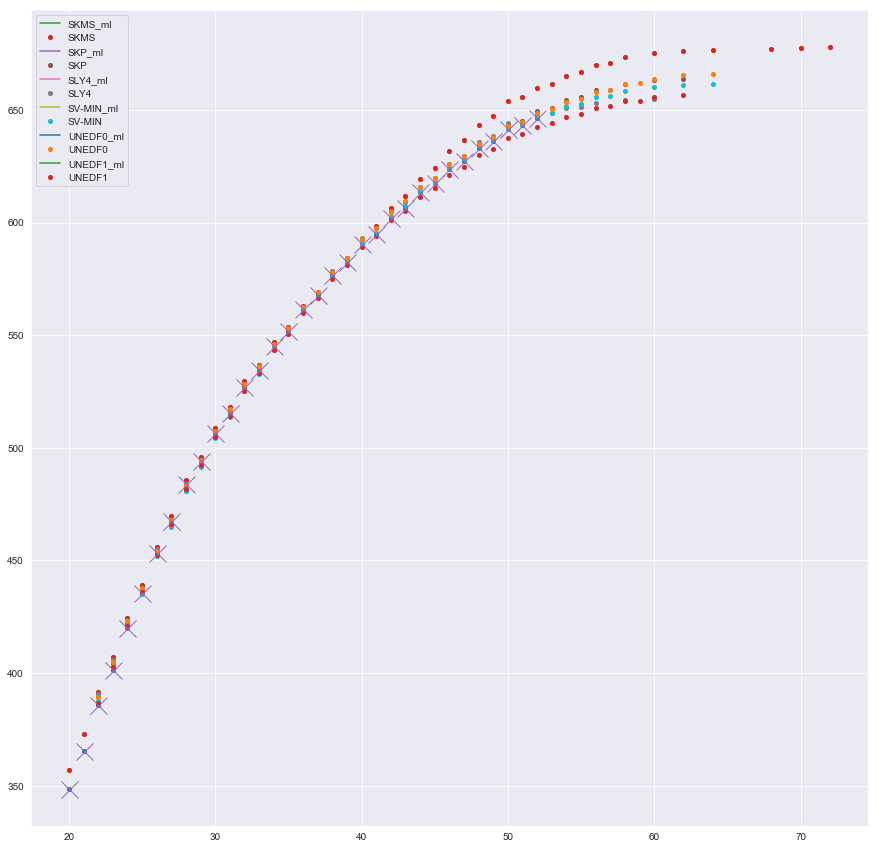

In [130]:
Sn_the_ml   =[[],[],[],[],[],[]]
Sn_ml       =[[],[],[],[],[],[]]

Sn_the      =[[],[],[],[],[],[]]
Sn_exp      =[]

n_Sn_the_ml =[[],[],[],[],[],[]]
n_Sn_the    =[[],[],[],[],[],[]]
n_Sn_exp    =[]

          
            

for i in range(0,6):
    for n in range(0,200):
        try:
            BE_T_ml_d[i][n, 28]  
            #ml_comp_d[i][n, 28]
            #Sn_ml[i].append(ml_comp_d[i][n, 28])
            Sn_the_ml[i].append(BE_T_ml_d[i][n, 28])  
            n_Sn_the_ml[i].append(n)  
        
        except KeyError:
            continue
            

for i in range(0,6):
    for n in range(0,200):
        try:
            the_energies_d[i][n, 28][2]
            Sn_the[i].append(the_energies_d[i][n, 28][2])
            n_Sn_the[i].append(n)
        
        except KeyError:
            continue
            
            

for n in range(0,200):
    try:
        exp_energies_d[n,28]
        Sn_exp.append(exp_energies_d[n,28])     
        n_Sn_exp.append(n)     
        
    except KeyError:
        continue
            
  
  
#for i in range(0,1):
#    plt.plot(n_Sn_the_ml[i], Sn_ml[i])#, "o", markersize=4)

#plt.show()



plt.plot(n_Sn_exp, Sn_exp, "o", markersize=4)
for i in range(0,1):
    plt.plot(n_Sn_the[i], Sn_the[i], "o", markersize=4)
 

for i in range(0,6):
    plt.plot(n_Sn_the_ml[i], Sn_the_ml[i], label=name[i]+"_ml")#, "o", markersize=4)
    plt.plot(n_Sn_the[i], Sn_the[i], "o", markersize=4, label=name[i])
 

plt.plot(n_Sn_exp, Sn_exp, "x", markersize=17)
plt.legend()
plt.show()

    

In [133]:
S_2n_all_the_ml=[[],[],[], [],[],[]]
S_2n_all_the_ml_d=[{},{},{},{},{},{}]

for i in range(0,6):
    for n in range(2,400):
        for z in range(0,300):
            try:
                BE_T_ml_d[i][n, z] 
                BE_T_ml_d[i][n-2, z]
                
                S_2n_all_the_ml[i].append((n, z, BE_T_ml_d[i][n, z]-BE_T_ml_d[i][n-2, z], BE_T_d[i][n, z]-BE_T_d[i][n-2, z]))
                S_2n_all_the_ml_d[i][n,z]= (n, BE_T_ml_d[i][n, z]-BE_T_ml_d[i][n-2, z], BE_T_d[i][n, z]-BE_T_d[i][n-2, z])
            
            except KeyError:
                continue


El_S_2n_the_ml=[[],[],[],[],[],[]]
El_z=28
for i in range(0,6):
    for n in range(0,400):
        try:
            S_2n_all_the_ml_d[i][n,El_z]
            El_S_2n_the_ml[i].append(S_2n_all_the_ml_d[i][n,El_z])
             
        except KeyError:
            continue
            
        

#for i in range(0,6):
#    print(np.transpose(El_S_2n_the_ml[i])[1][-1])
#    print(np.transpose(El_S_2n_the_ml[i])[2][-1])
    
    #plt.plot(np.transpose(El_S_2n_the_ml[i])[0],np.transpose(El_S_2n_the_ml[i])[1],label=name[i]+'_ml')
    #plt.plot(np.transpose(El_S_2n_the_ml[i])[0],np.transpose(El_S_2n_the_ml[i])[2],label=name[i])
    #plt.legend()
    #plt.show()  
                

                
"""
for i in range(0,6):
    ext = np.int(np.ceil(max(-np.min(np.transpose(S_2n_all_the[i])[2]),np.max(np.transpose(S_2n_all_the[i])[2]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(S_2n_all_the[i])[0],np.transpose(S_2n_all_the[i])[1],c=np.transpose(S_2n_all_the[i])[2],cmap='PiYG',vmin=-ext,vmax=ext,s=5)
    #plt.plot(np.transpose(body_ndrip_NZ)[0],np.transpose(body_ndrip_NZ)[1], 'x', markersize=2)
    plt.title('all ml predictions of exp the difference')
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.colorbar(sc)
    plt.show()
   """ 
""" 
El_S_2n_ml=[[],[],[],[],[],[]]
El_z=28
for i in range(0,6):
    for n in range(0,400):
        try:
            S_2n_all_the_d[i][n,El_z]
            El_S_2n_ml[i].append((n, S_2n_all_the_d[i][n,El_z]))
                    
        except KeyError:
            continue
        

for i in range(0,6):
    plt.plot(np.transpose(El_S_2n_ml[i])[0],np.transpose(El_S_2n_ml[i])[1],label=name[i]+'_ml')

plt.legend()
plt.show()
""" 
            
            

" \nEl_S_2n_ml=[[],[],[],[],[],[]]\nEl_z=28\nfor i in range(0,6):\n    for n in range(0,400):\n        try:\n            S_2n_all_the_d[i][n,El_z]\n            El_S_2n_ml[i].append((n, S_2n_all_the_d[i][n,El_z]))\n                    \n        except KeyError:\n            continue\n        \n\nfor i in range(0,6):\n    plt.plot(np.transpose(El_S_2n_ml[i])[0],np.transpose(El_S_2n_ml[i])[1],label=name[i]+'_ml')\n\nplt.legend()\nplt.show()\n"

In [134]:
Be_T_all    =[]
Be_T_ml_all =[]

BE_std=[]
BE_ml_std=[]

for z in range(0,500):
    for n in range(0,500):
        try:
            BE_T_d[0][n, z]
            BE_T_d[1][n, z]
            BE_T_d[2][n, z]
            BE_T_d[3][n, z]
            BE_T_d[4][n, z]
            BE_T_d[5][n, z]
            
            #BE_Std=[BE_T_d[0][n, z],BE_T_d[2][n, z],BE_T_d[3][n, z],BE_T_d[4][n, z],BE_T_d[5][n, z]]
            
            BE_std.append((n,z,np.std((BE_T_d[0][n, z],BE_T_d[1][n, z],BE_T_d[2][n, z],BE_T_d[3][n, z],BE_T_d[5][n, z],BE_T_d[4][n, z]))))
            BE_ml_std.append((n,z,np.std((BE_T_ml_d[0][n, z],BE_T_ml_d[1][n, z],BE_T_ml_d[2][n, z],BE_T_ml_d[3][n, z],BE_T_ml_d[4][n, z],BE_T_ml_d[5][n, z]))))
            
            #Be_T_all.append((z,n,BE_T_d[0][n, z],BE_T_d[2][n, z],BE_T_d[3][n, z],BE_T_d[4][n, z],BE_T_d[5][n, z]))
            
        except KeyError:
            continue
            
print(max(np.transpose(BE_ml_std)[2]))
                
ext = np.int(np.ceil(max(-np.min(np.transpose(BE_std)[2]),np.max(np.transpose(BE_std)[2]))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(BE_std)[0],np.transpose(BE_std)[1],c=np.transpose(BE_std)[2],cmap='PiYG',vmin=-ext,vmax=ext,s=5)
plt.title('all ml predictions of exp the difference')
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.colorbar(sc)
plt.show()
ext = np.int(np.ceil(max(np.transpose(BE_ml_std)[2])))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(BE_ml_std)[0],np.transpose(BE_ml_std)[1],c=np.transpose(BE_ml_std)[2],cmap='Blues',vmax=ext,s=5)
plt.title('all ml predictions of exp the difference')
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.colorbar(sc)
plt.show()
         
    

IndexError: index 2 is out of bounds for axis 0 with size 0

# WORSE BROKEN DON'T GO PAST


In [21]:
rf_ZQ_name=["rf_ZQ_SKMS",
         "rf_ZQ_SKP",
         "rf_ZQ_SLY4",
         "rf_ZQ_SV-MIN",
         "rf_ZQ_UNEDF0",
         "rf_ZQ_UNEDF1",]


for i in range(0,6):
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    zdrip_range[i]=np.transpose(zdrip_range[i])
    ndrip_range[i]=np.transpose(ndrip_range[i])
    the_exp_mat_range[i]=np.transpose(the_exp_mat_range[i]) 
    the_exp_mat_reduced_range[i]=np.transpose(the_exp_mat_reduced_range[i])    
    the_no_mat_range[i]=np.transpose(the_no_mat_range[i])
    the_range[i]=np.transpose(the_range[i])
    the_energies[i]=np.transpose(the_energies[i])
    
    zdrip_energies[i]=np.transpose(zdrip_energies[i])
    ndrip_energies[i]=np.transpose(ndrip_energies[i])
    the_exp_mat_energies[i]=np.transpose(the_exp_mat_energies[i]) 
    the_exp_mat_reduced_energies[i]=np.transpose(the_exp_mat_reduced_energies[i])    
    the_no_mat_energies[i]=np.transpose(the_no_mat_energies[i])
    
    zdrip_nonan_energies[i]=np.transpose(zdrip_nonan_energies[i])              
    ndrip_nonan_energies[i]=np.transpose(ndrip_nonan_energies[i])
    the_exp_mat_reduced_nonan_energies[i]=np.transpose(the_exp_mat_reduced_nonan_energies[i])
    the_exp_mat_nonan_energies[i]=np.transpose(the_exp_mat_nonan_energies[i])
    the_no_mat_nonan_energies[i]=np.transpose(the_no_mat_nonan_energies[i])
    the_nonan_energies[i]=np.transpose(the_nonan_energies[i])
    
    
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++


BE_T_ml        =[[],[],[], [],[],[]]
BE_T_ml_d      =[{},{},{}, {},{},{}]
the_NZ         =[[],[],[], [],[],[]]
ml_comp        =[[],[],[], [],[],[]]
ml_comp_d      =[{},{},{}, {},{},{}]

for i in range(0,6):
    
    print(rf_ZQ_name[i])
    train_test_features=np.transpose(np.stack((the_exp_mat_reduced_range[i][1],the_exp_mat_reduced_range[i][5])))
    train_test_NZ      =np.transpose(np.stack((the_exp_mat_reduced_range[i][0],the_exp_mat_reduced_range[i][1])))
    train_test_target  =the_exp_mat_reduced_range[i][4]
    
    body_ndrip_features=np.transpose(np.stack((the_exp_mat_range[i][1],the_exp_mat_range[i][5])))
    body_ndrip_NZ      =np.transpose(np.stack((the_exp_mat_range[i][0],the_exp_mat_range[i][1])))
    body_ndrip_target  =the_exp_mat_range[i][4]
    
    ndrip_features     =np.transpose(np.stack((ndrip_range[i][1],ndrip_range[i][5])))
    ndrip_NZ           =np.transpose(np.stack((ndrip_range[i][0],ndrip_range[i][1])))
    ndrip_target       =ndrip_range[i][4]
    
    features           =np.transpose(np.stack((the_range[i][1],the_range[i][3])))
    the_NZ[i]          =np.transpose(np.stack((the_range[i][0],the_range[i][1])))
    the_BE             =the_range[i][2]
    
    BE_T_ml[i]=t_be_improve(train_test_features,
                          train_test_target,
                          train_test_NZ,
                          ndrip_features,
                          ndrip_target,
                          ndrip_NZ,
                          features,
                          the_BE,
                          the_NZ[i],
                          body_ndrip_features,
                          body_ndrip_target,
                          body_ndrip_NZ)
    
    """
    ml_comp[i]=ml_predict(train_test_features,
                          train_test_target,
                          train_test_NZ,
                          ndrip_features,
                          ndrip_target,
                          ndrip_NZ,
                          features,
                          the_BE,
                          the_NZ[i],
                          body_ndrip_features,
                          body_ndrip_target,
                          body_ndrip_NZ)
    """
    
    
    
    
    for j in range(0,len(the_NZ[i])):
        BE_T_ml_d[i][the_NZ[i][j][0],the_NZ[i][j][1]]=BE_T_ml[i][j]
        #ml_comp_d[i][the_NZ[i][j][0],the_NZ[i][j][1]]=ml_comp[i][j]
    
    
    

    

    
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++
for i in range(0,6):
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    zdrip_range[i]=np.transpose(zdrip_range[i])
    ndrip_range[i]=np.transpose(ndrip_range[i])
    the_exp_mat_range[i]=np.transpose(the_exp_mat_range[i]) 
    the_exp_mat_reduced_range[i]=np.transpose(the_exp_mat_reduced_range[i])    
    the_no_mat_range[i]=np.transpose(the_no_mat_range[i])
    the_range[i]=np.transpose(the_range[i])
    the_energies[i]=np.transpose(the_energies[i])
    
     
    
    zdrip_energies[i]=np.transpose(zdrip_energies[i])
    ndrip_energies[i]=np.transpose(ndrip_energies[i])
    the_exp_mat_energies[i]=np.transpose(the_exp_mat_energies[i]) 
    the_exp_mat_reduced_energies[i]=np.transpose(the_exp_mat_reduced_energies[i])    
    the_no_mat_energies[i]=np.transpose(the_no_mat_energies[i])
    
    
    zdrip_nonan_energies[i]=np.transpose(zdrip_nonan_energies[i])              
    ndrip_nonan_energies[i]=np.transpose(ndrip_nonan_energies[i])
    the_exp_mat_reduced_nonan_energies[i]=np.transpose(the_exp_mat_reduced_nonan_energies[i])
    the_exp_mat_nonan_energies[i]=np.transpose(the_exp_mat_nonan_energies[i])
    the_no_mat_nonan_energies[i]=np.transpose(the_no_mat_nonan_energies[i])
    the_nonan_energies[i]=np.transpose(the_nonan_energies[i])
    
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    



rf_ZQ_SKMS
features:          (2350, 2)
target:            (2350,)
ndrip_features:    (219, 2)
ndrip_target:      (219,)
all_the_features:  (5241, 2)
all_the_values:    (5241,)
training score:  0.9780892033887777
testing score:   0.8193063024785195
full score:      0.9394069261938051
ndrip score:      0.5907817326272112 


train sqrd mean sqrd error:       0.8019180791178219
test sqrd mean sqrd error:        2.262628347441537
all body sqrd mean sqrd error:    1.3278285440810085
ndrip sqrd mean sqrd error:       3.447716744667878 


rf_ZQ_SKP
features:          (2382, 2)
target:            (2382,)
ndrip_features:    (219, 2)
ndrip_target:      (219,)
all_the_features:  (4659, 2)
all_the_values:    (4659,)
training score:  0.9800306079064731
testing score:   0.8419624294517434
full score:      0.9457569334139249
ndrip score:      0.853701969569674 


train sqrd mean sqrd error:       0.35121658639883924
test sqrd mean sqrd error:        0.983233315090716
all body sqrd mean sqrd error:   

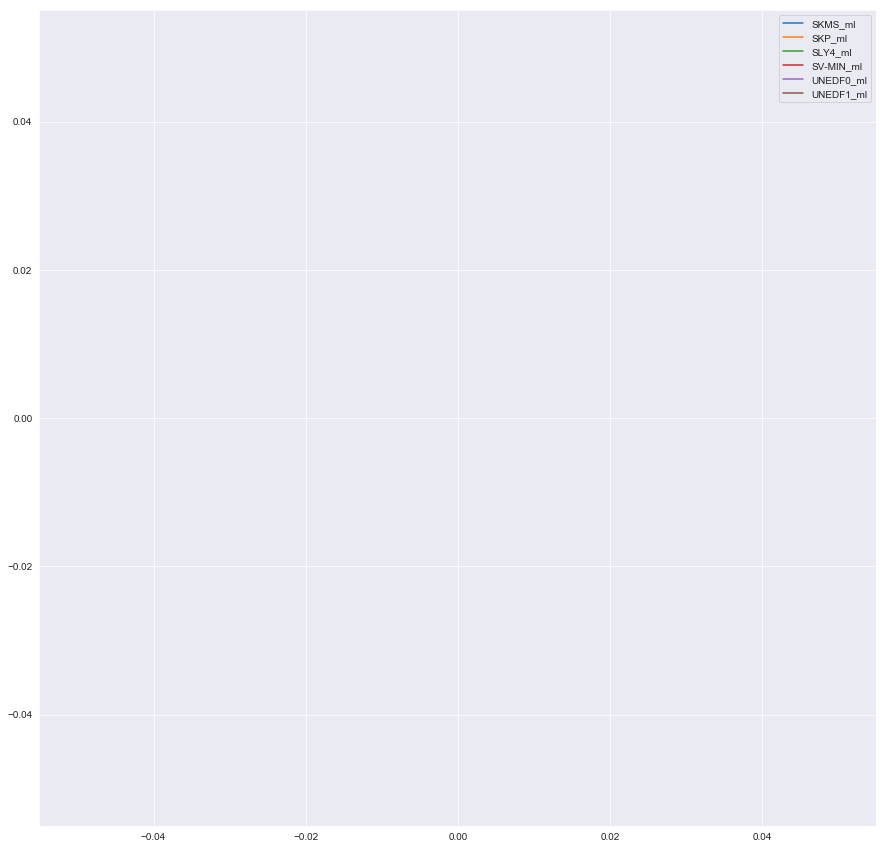

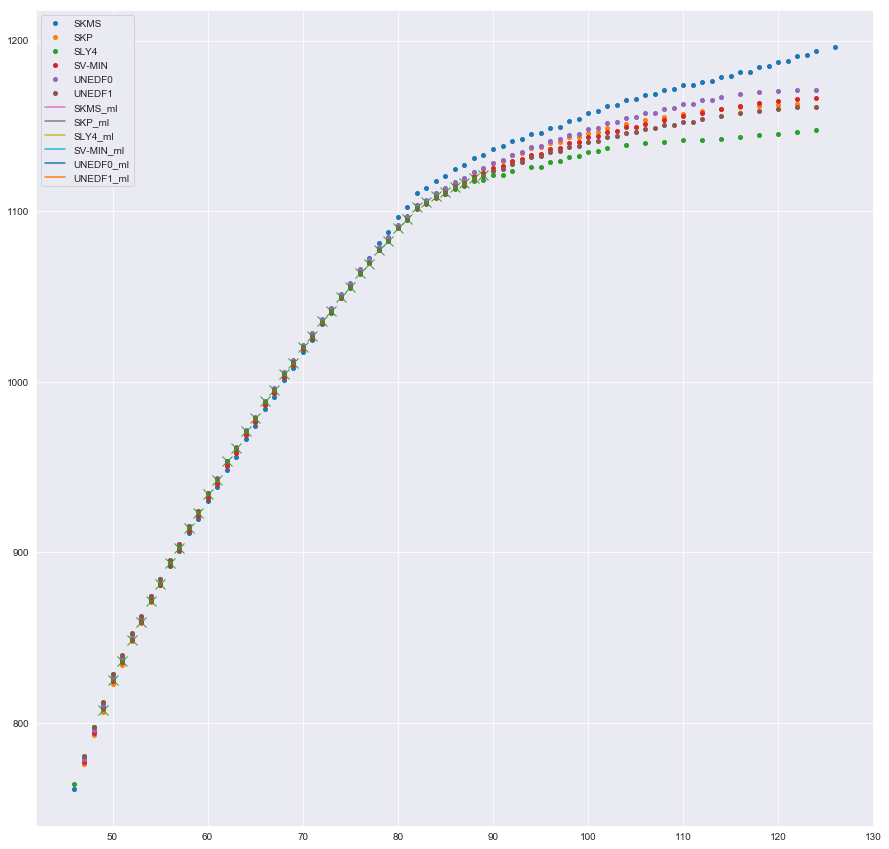

In [22]:
Sn_the_ml   =[[],[],[],[],[],[]]
Sn_ml       =[[],[],[],[],[],[]]

Sn_the      =[[],[],[],[],[],[]]
Sn_exp      =[]

n_Sn_the_ml =[[],[],[],[],[],[]]
n_Sn_the    =[[],[],[],[],[],[]]
n_Sn_exp    =[]

          
            

for i in range(0,6):
    for n in range(0,200):
        try:
            BE_T_ml_d[i][n, 50]  
            ml_comp_d[i][n, 50]
            Sn_ml[i].append(ml_comp_d[i][n, 50])
            Sn_the_ml[i].append(BE_T_ml_d[i][n, 50])  
            n_Sn_the_ml[i].append(n)  
        
        except KeyError:
            continue
            

for i in range(0,6):
    for n in range(0,200):
        try:
            the_energies_d[i][n, 50][2]
            Sn_the[i].append(the_energies_d[i][n, 50][2])
            n_Sn_the[i].append(n)
        
        except KeyError:
            continue
            
            

for n in range(0,200):
    try:
        exp_energies_d[n,50]
        Sn_exp.append(exp_energies_d[n,50])     
        n_Sn_exp.append(n)     
        
    except KeyError:
        continue
            
  
  
for i in range(0,6):
    plt.plot(n_Sn_the_ml[i], Sn_ml[i], label=name[i]+"_ml")#, "o", markersize=4)


plt.legend()
plt.show()



for i in range(0,6):
    plt.plot(n_Sn_the[i], Sn_the[i], "o", markersize=4, label=name[i])
    
for i in range(0,6):
    plt.plot(n_Sn_the_ml[i], Sn_the_ml[i], label=name[i]+"_ml")#, "o", markersize=4)

plt.plot(n_Sn_exp, Sn_exp, "x", markersize=10)
plt.legend()
plt.show()

    

In [148]:
rf_ZQ_name=["rf_ZQ_SKMS",
         "rf_ZQ_SKP",
         "rf_ZQ_SLY4",
         "rf_ZQ_SV-MIN",
         "rf_ZQ_UNEDF0",
         "rf_ZQ_UNEDF1",]


for i in range(0,6):
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    zdrip_range[i]=np.transpose(zdrip_range[i])
    ndrip_range[i]=np.transpose(ndrip_range[i])
    the_exp_mat_range[i]=np.transpose(the_exp_mat_range[i]) 
    the_exp_mat_reduced_range[i]=np.transpose(the_exp_mat_reduced_range[i])    
    the_no_mat_range[i]=np.transpose(the_no_mat_range[i])
    the_range[i]=np.transpose(the_range[i])
    the_energies[i]=np.transpose(the_energies[i])
    
    zdrip_energies[i]=np.transpose(zdrip_energies[i])
    ndrip_energies[i]=np.transpose(ndrip_energies[i])
    the_exp_mat_energies[i]=np.transpose(the_exp_mat_energies[i]) 
    the_exp_mat_reduced_energies[i]=np.transpose(the_exp_mat_reduced_energies[i])    
    the_no_mat_energies[i]=np.transpose(the_no_mat_energies[i])
    
    zdrip_nonan_energies[i]=np.transpose(zdrip_nonan_energies[i])              
    ndrip_nonan_energies[i]=np.transpose(ndrip_nonan_energies[i])
    the_exp_mat_reduced_nonan_energies[i]=np.transpose(the_exp_mat_reduced_nonan_energies[i])
    the_exp_mat_nonan_energies[i]=np.transpose(the_exp_mat_nonan_energies[i])
    the_no_mat_nonan_energies[i]=np.transpose(the_no_mat_nonan_energies[i])
    the_nonan_energies[i]=np.transpose(the_nonan_energies[i])
    
    
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++


BE_T_ml        =[[],[],[], [],[],[]]
BE_T_ml_d      =[{},{},{}, {},{},{}]
the_NZ         =[[],[],[], [],[],[]]
ml_comp        =[[],[],[], [],[],[]]
ml_comp_d      =[{},{},{}, {},{},{}]

for i in range(0,6):
    
    print(rf_ZQ_name[i])
    train_test_features=np.transpose(np.stack((the_exp_mat_nonan_energies[i][1]+the_exp_mat_nonan_energies[i][0],the_exp_mat_nonan_energies[i][5])))
    train_test_NZ      =np.transpose(np.stack((the_exp_mat_nonan_energies[i][1],the_exp_mat_nonan_energies[i][0])))
    train_test_target  =the_exp_mat_nonan_energies[i][4]
    
    body_ndrip_features=np.transpose(np.stack((the_exp_mat_nonan_energies[i][1]+the_exp_mat_nonan_energies[i][0],the_exp_mat_nonan_energies[i][5])))
    body_ndrip_NZ      =np.transpose(np.stack((the_exp_mat_nonan_energies[i][0],the_exp_mat_nonan_energies[i][1])))
    body_ndrip_target  =the_exp_mat_nonan_energies[i][4]
    
    ndrip_features     =np.transpose(np.stack((ndrip_nonan_energies[i][1]+ndrip_nonan_energies[i][0],ndrip_nonan_energies[i][5])))
    ndrip_NZ           =np.transpose(np.stack((ndrip_nonan_energies[i][0],ndrip_nonan_energies[i][1])))
    ndrip_target       =ndrip_nonan_energies[i][4]
    
    features           =np.transpose(np.stack((the_nonan_energies[i][1]+the_nonan_energies[i][0],the_nonan_energies[i][3])))
    the_NZ[i]          =np.transpose(np.stack((the_nonan_energies[i][0],the_nonan_energies[i][1])))
    the_BE             =the_nonan_energies[i][2]
    
    
    
    BE_T_ml[i]=t_be_improve(train_test_features,
                          train_test_target,
                          train_test_NZ,
                          ndrip_features,
                          ndrip_target,
                          ndrip_NZ,
                          features,
                          the_BE,
                          the_NZ[i],
                          body_ndrip_features,
                          body_ndrip_target,
                          body_ndrip_NZ)
    
    """
    ml_comp[i]=ml_predict(train_test_features,
                          train_test_target,
                          train_test_NZ,
                           ndrip_features,
                          ndrip_target,
                          ndrip_NZ,
                          features,
                          the_BE,
                          the_NZ[i],
                          body_ndrip_features,
                         body_ndrip_target,
                          body_ndrip_NZ)"""
    
    
    
    
    
    for j in range(0,len(the_NZ[i])):
        BE_T_ml_d[i][the_NZ[i][j][0],the_NZ[i][j][1]]=BE_T_ml[i][j]
        #ml_comp_d[i][the_NZ[i][j][0],the_NZ[i][j][1]]=ml_comp[i][j]
    
    
    

    

    
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#++++++++++++++++++++++++++++++++++++++++++++++++
for i in range(0,6):
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    zdrip_range[i]=np.transpose(zdrip_range[i])
    ndrip_range[i]=np.transpose(ndrip_range[i])
    the_exp_mat_range[i]=np.transpose(the_exp_mat_range[i]) 
    the_exp_mat_reduced_range[i]=np.transpose(the_exp_mat_reduced_range[i])    
    the_no_mat_range[i]=np.transpose(the_no_mat_range[i])
    the_range[i]=np.transpose(the_range[i])
    the_energies[i]=np.transpose(the_energies[i])
    
     
    
    zdrip_energies[i]=np.transpose(zdrip_energies[i])
    ndrip_energies[i]=np.transpose(ndrip_energies[i])
    the_exp_mat_energies[i]=np.transpose(the_exp_mat_energies[i]) 
    the_exp_mat_reduced_energies[i]=np.transpose(the_exp_mat_reduced_energies[i])    
    the_no_mat_energies[i]=np.transpose(the_no_mat_energies[i])
    
    
    zdrip_nonan_energies[i]=np.transpose(zdrip_nonan_energies[i])              
    ndrip_nonan_energies[i]=np.transpose(ndrip_nonan_energies[i])
    the_exp_mat_reduced_nonan_energies[i]=np.transpose(the_exp_mat_reduced_nonan_energies[i])
    the_exp_mat_nonan_energies[i]=np.transpose(the_exp_mat_nonan_energies[i])
    the_no_mat_nonan_energies[i]=np.transpose(the_no_mat_nonan_energies[i])
    the_nonan_energies[i]=np.transpose(the_nonan_energies[i])
    
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  

rf_ZQ_SKMS
features:          (3257, 2)
target:            (3257,)
ndrip_features:    (345, 2)
ndrip_target:      (345,)
all_the_features:  (8687, 2)
all_the_values:    (8687,)
training score:  0.9911524951072762
testing score:   0.9248637804903851
full score:      0.9741224818427255
ndrip score:      0.9834106176646942 


train sqrd mean sqrd error:       0.6205112935029047
test sqrd mean sqrd error:        1.8428091141181047
all body sqrd mean sqrd error:    1.0669842497034079
ndrip sqrd mean sqrd error:       1.0815215515604586 


rf_ZQ_SKP
features:          (3277, 2)
target:            (3277,)
ndrip_features:    (345, 2)
ndrip_target:      (345,)
all_the_features:  (7465, 2)
all_the_values:    (7465,)
training score:  0.9914258632862167
testing score:   0.9469905539181429
full score:      0.9794304840097904
ndrip score:      0.9916321150290363 


train sqrd mean sqrd error:       0.3068310722116675
test sqrd mean sqrd error:        0.8039191983718077
all body sqrd mean sqrd error:

# END OF RF application

# Graphs

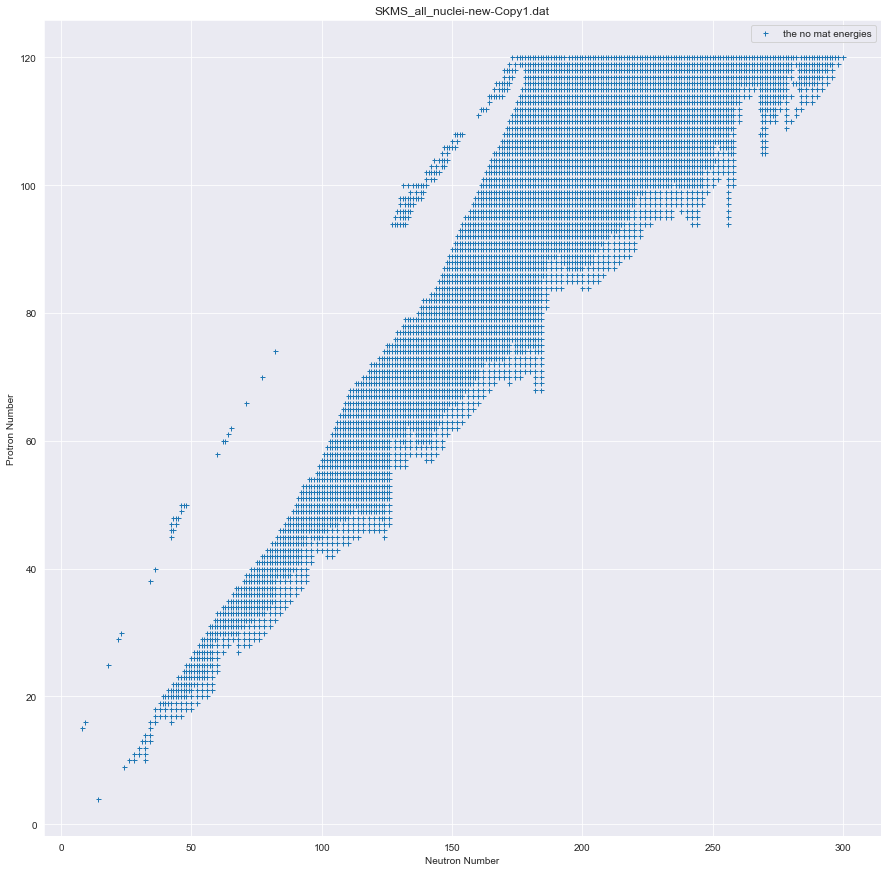

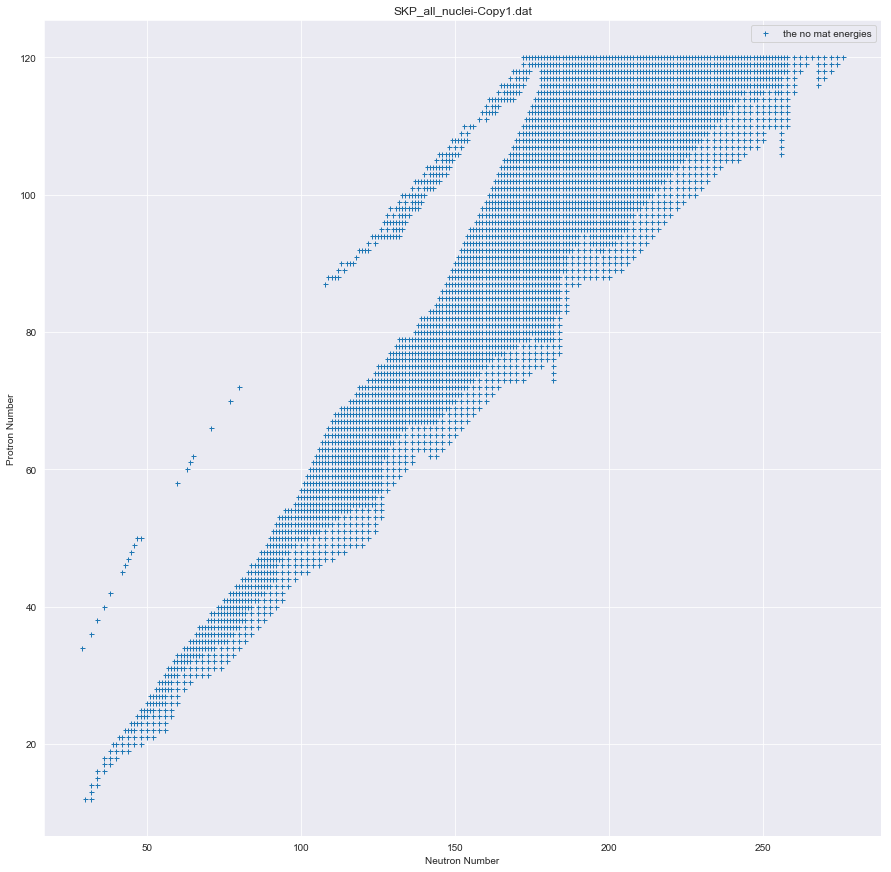

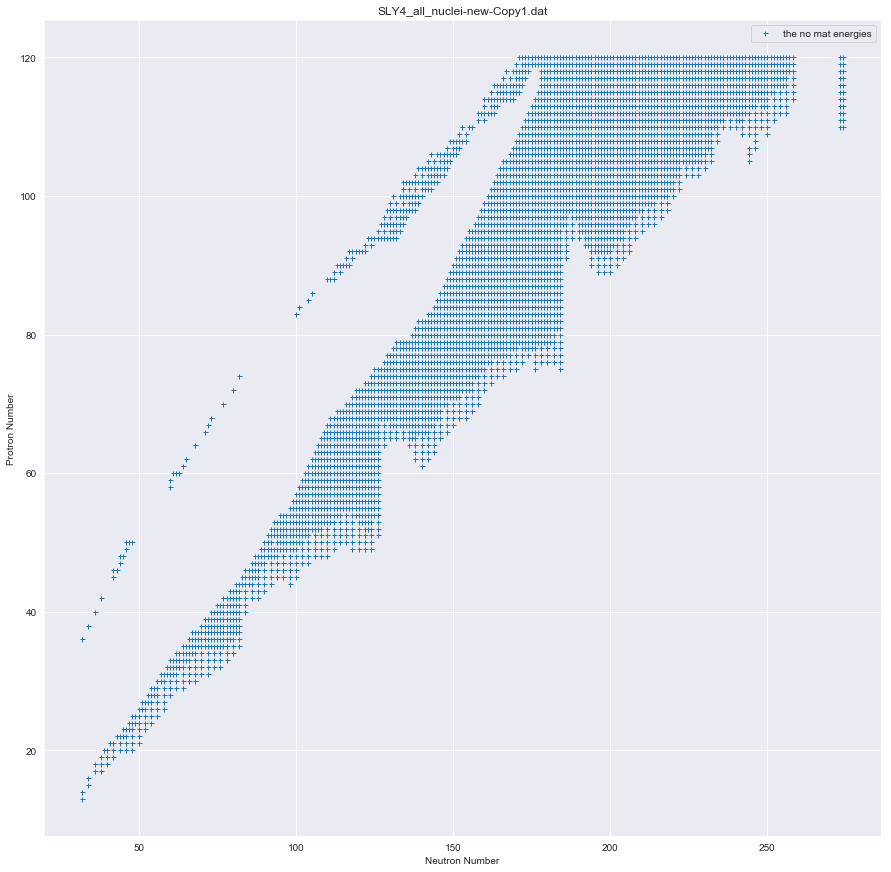

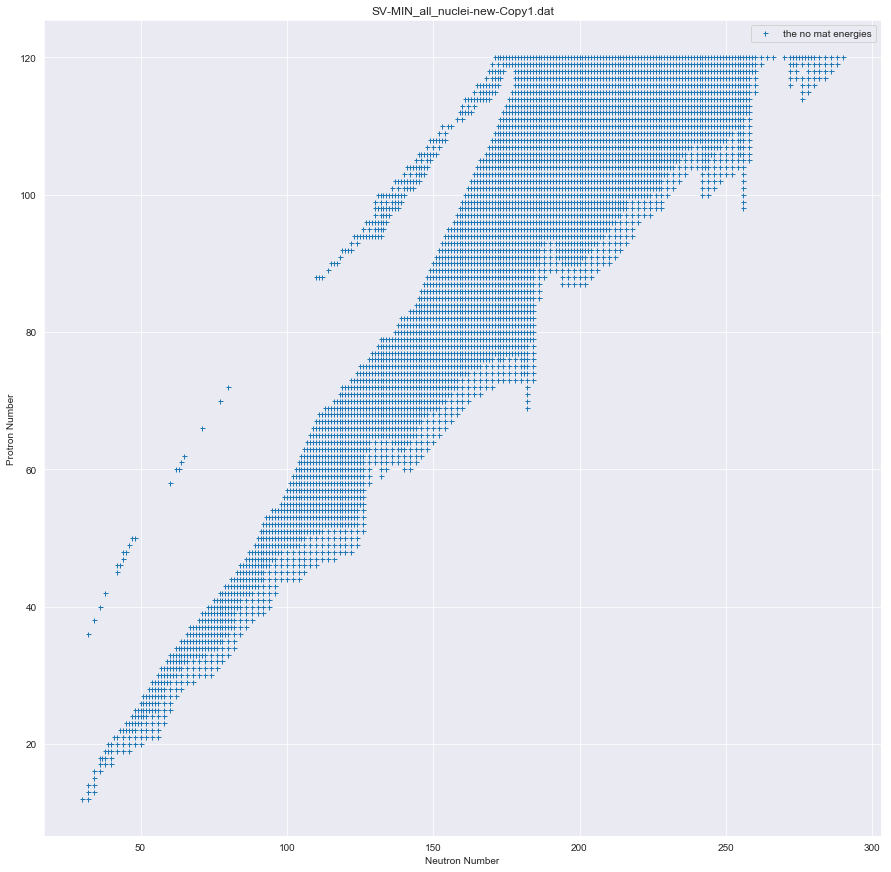

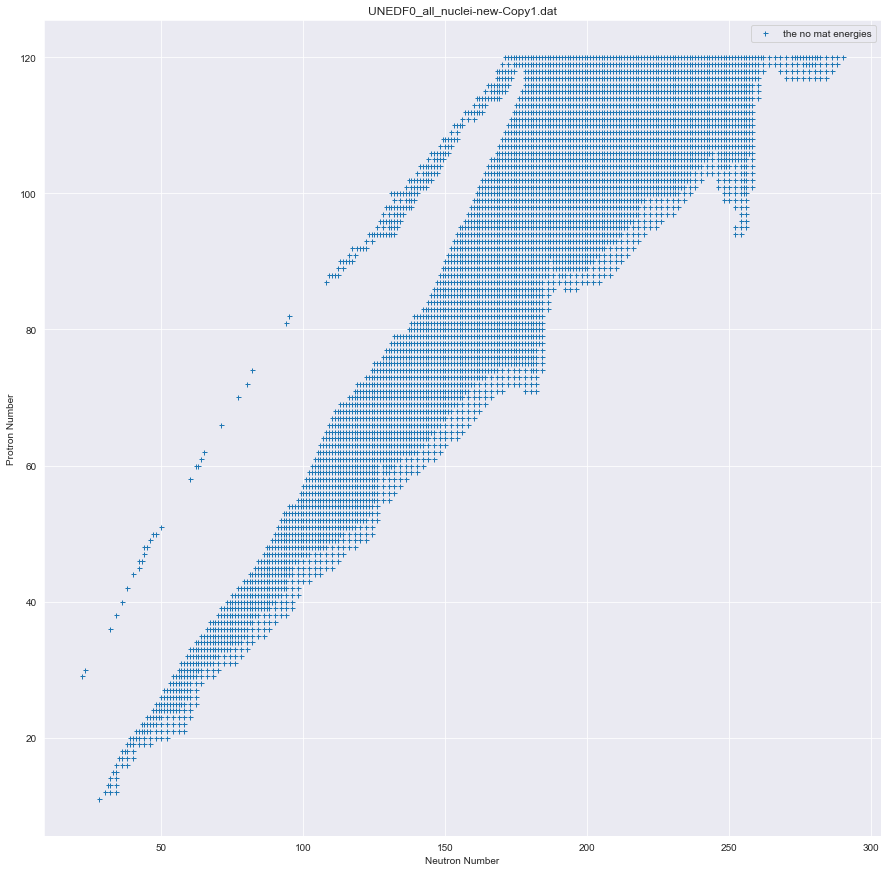

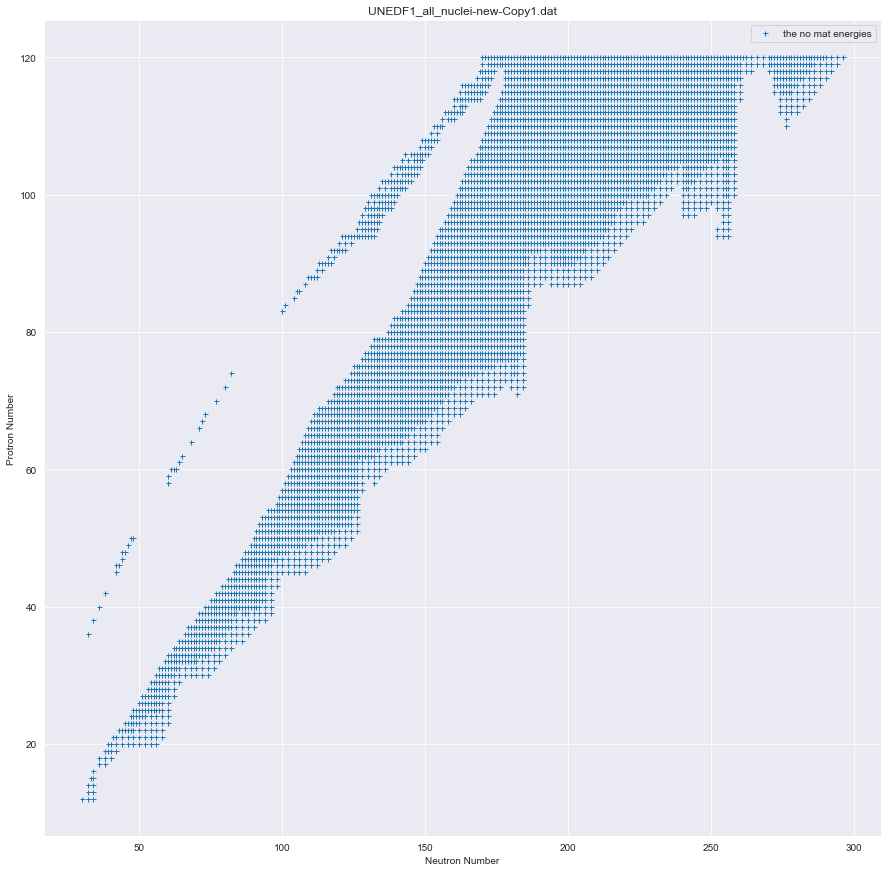

In [466]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#GRAPHS
#GRAPHS
#GRAPHS
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$



#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!    
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
exp_energies=np.transpose(exp_energies)
exp_range=np.transpose(exp_range)
for i in range(0,6):
    the_energies[i]=np.transpose(the_energies[i])
    the_no_mat_energies[i]=np.transpose(the_no_mat_energies[i])
    
    the_range[i]=np.transpose(the_range[i])
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!    
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!



for i in range(0,6):
    """
    ext = np.int(np.ceil(max(the_energies[i][2])))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(the_energies[i][1],the_energies[i][0],c=the_energies[i][2],cmap='Blues',vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(the_names[i]+" Theoretical Binding Energies")
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')   
    plt.show()

    
    
    ext = np.int(np.ceil(max(the_range[i][2])))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(the_range[i][1],the_range[i][0],c=the_range[i][2],cmap='Blues',vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(the_names[i]+" Theoretical Binding Energies")
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')   
    plt.show()
    """
    
    #plt.plot(the_energies[i][0],the_energies[i][1], "+", markersize=5, label='theoretical energies')
    plt.plot(the_no_mat_energies[i][0],the_no_mat_energies[i][1], "+", markersize=5, label='the no mat energies')
    
    #plt.plot(the_range[i][0],the_range[i][1], "x", markersize=4, label='theoretical range')
    #plt.plot(exp_energies[0],exp_energies[1], "+", markersize=5, label='Experimental energies')
    #plt.plot(exp_range[0],exp_range[1], "x", markersize=4, label='Experimental range')
    plt.title(the_names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.grid(True)
    plt.legend()
    plt.show()

    
    
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!    
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
exp_energies=np.transpose(exp_energies)
exp_range=np.transpose(exp_range)
for i in range(0,6):
    the_energies[i]=np.transpose(the_energies[i])
    the_no_mat_energies[i]=np.transpose(the_no_mat_energies[i])
    the_range[i]=np.transpose(the_range[i])

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!    
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!




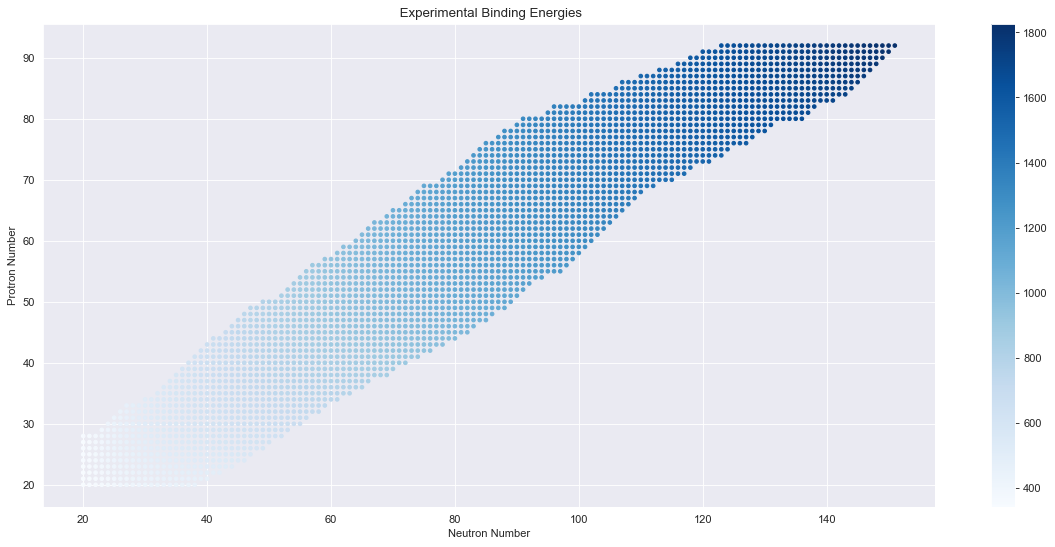

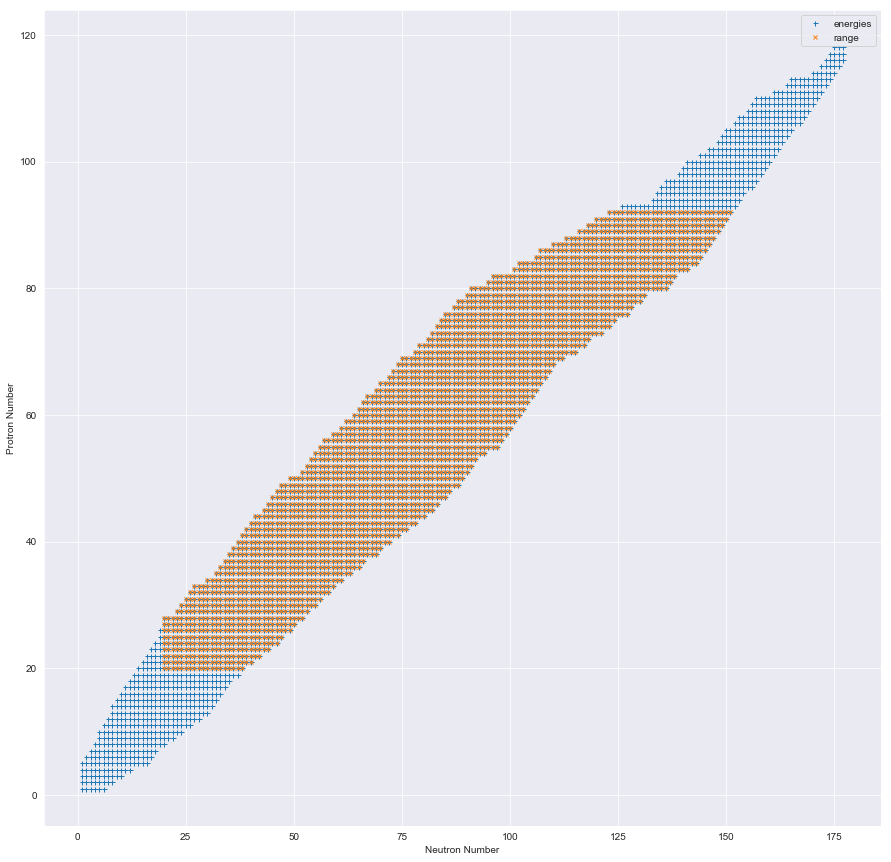

In [467]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#GRAPHS
#GRAPHS
#GRAPHS
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

exp_range=np.transpose(exp_range)
exp_energies=np.transpose(exp_energies)

ext = np.int(np.ceil(max(exp_range[2])))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(exp_range[0],exp_range[1],c=exp_range[2],cmap='Blues',vmax=ext,s=10)
plt.colorbar(sc)
plt.title(" Experimental Binding Energies")
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')   
plt.show()

plt.plot(exp_energies[0],exp_energies[1], "+", markersize=5, label='energies')
plt.plot(exp_range[0],exp_range[1], "x", markersize=4, label='range')
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.grid(True)
plt.legend()
plt.show()

exp_range=np.transpose(exp_range)
exp_energies=np.transpose(exp_energies)


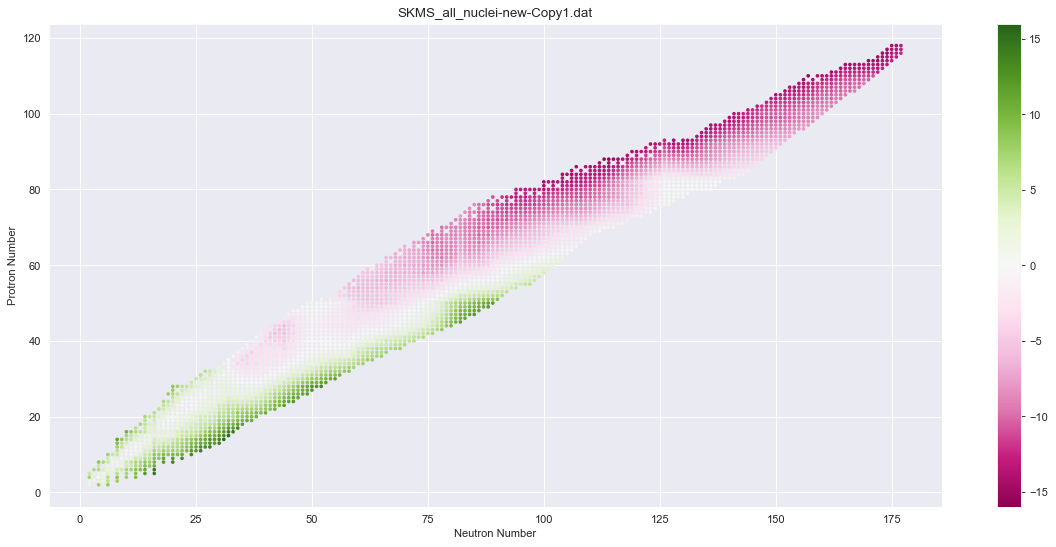

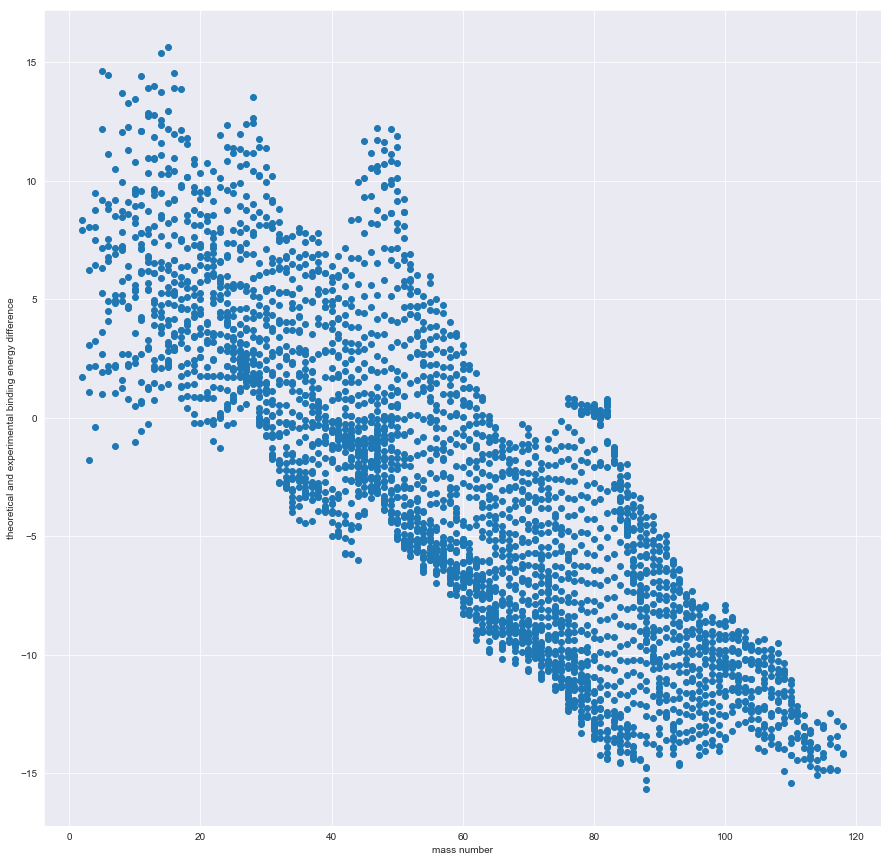

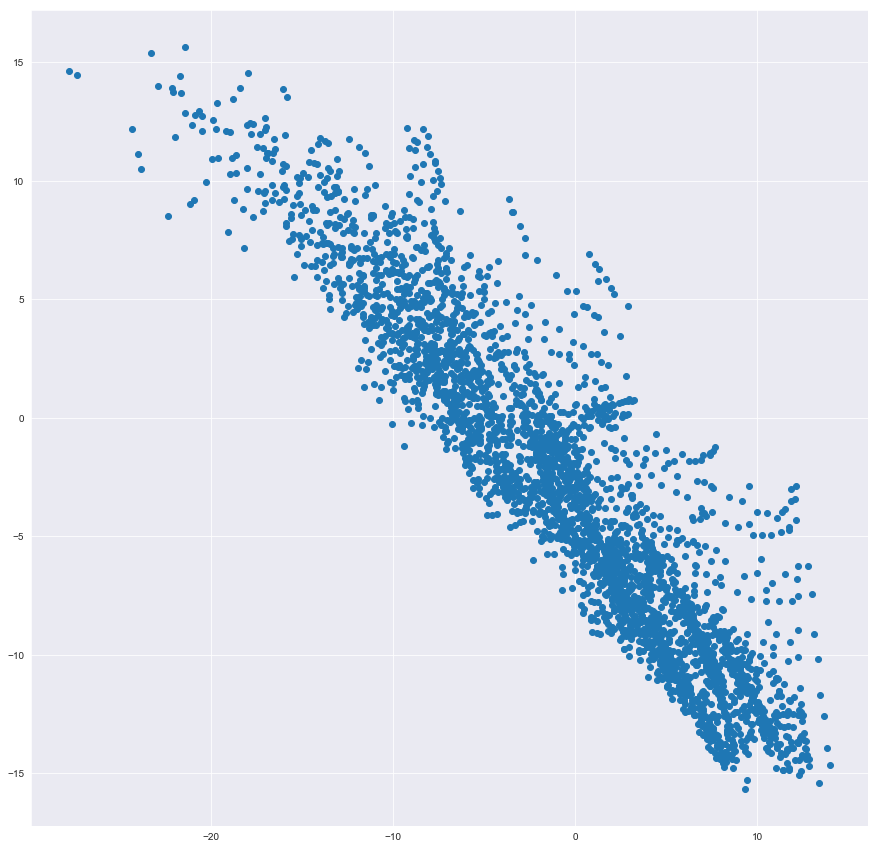

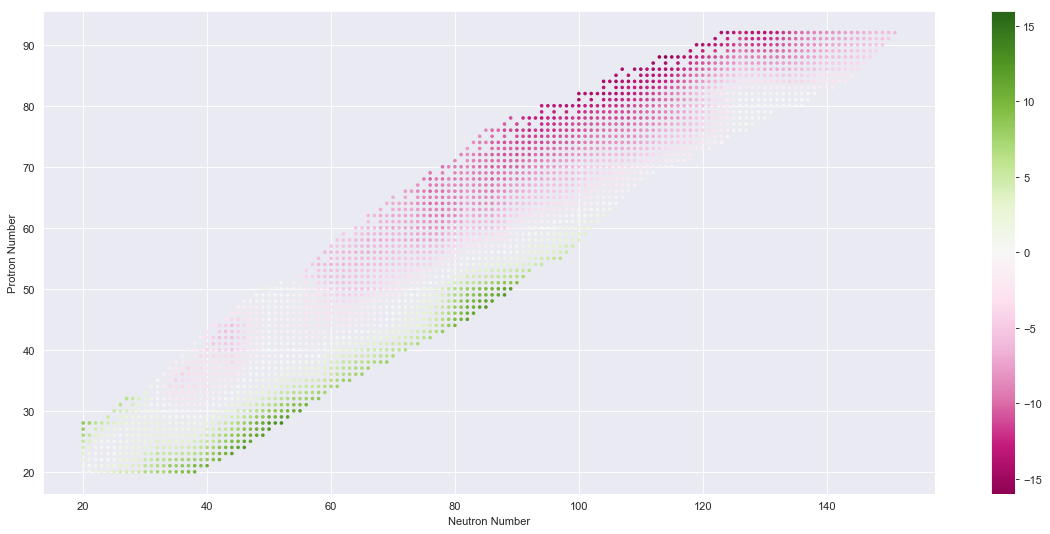

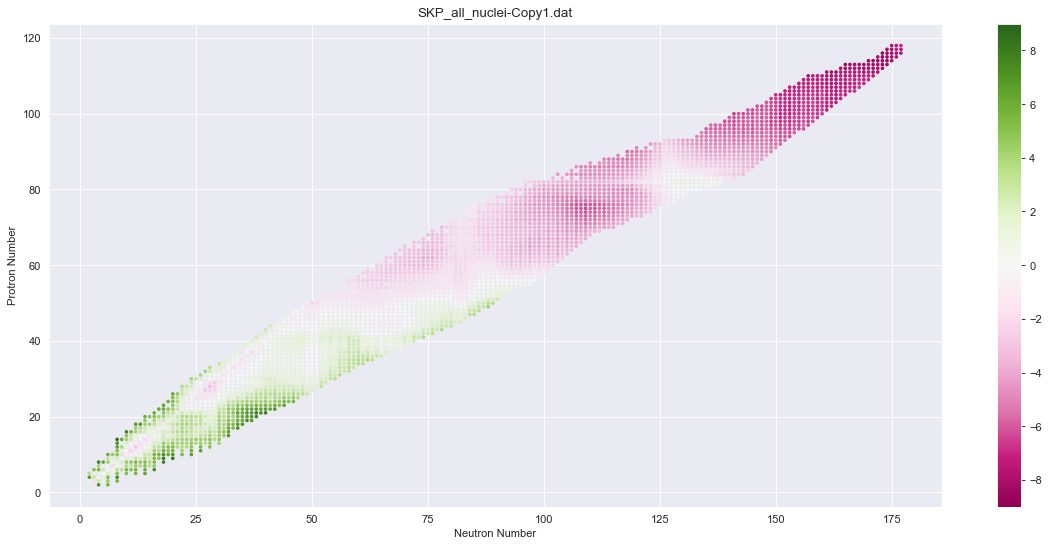

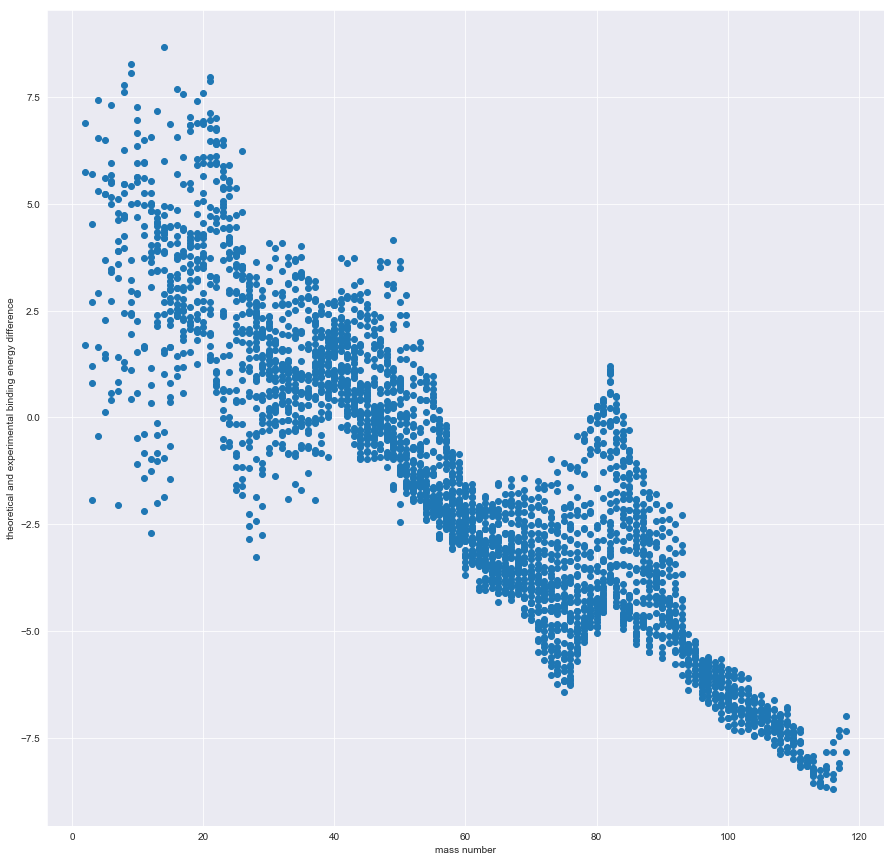

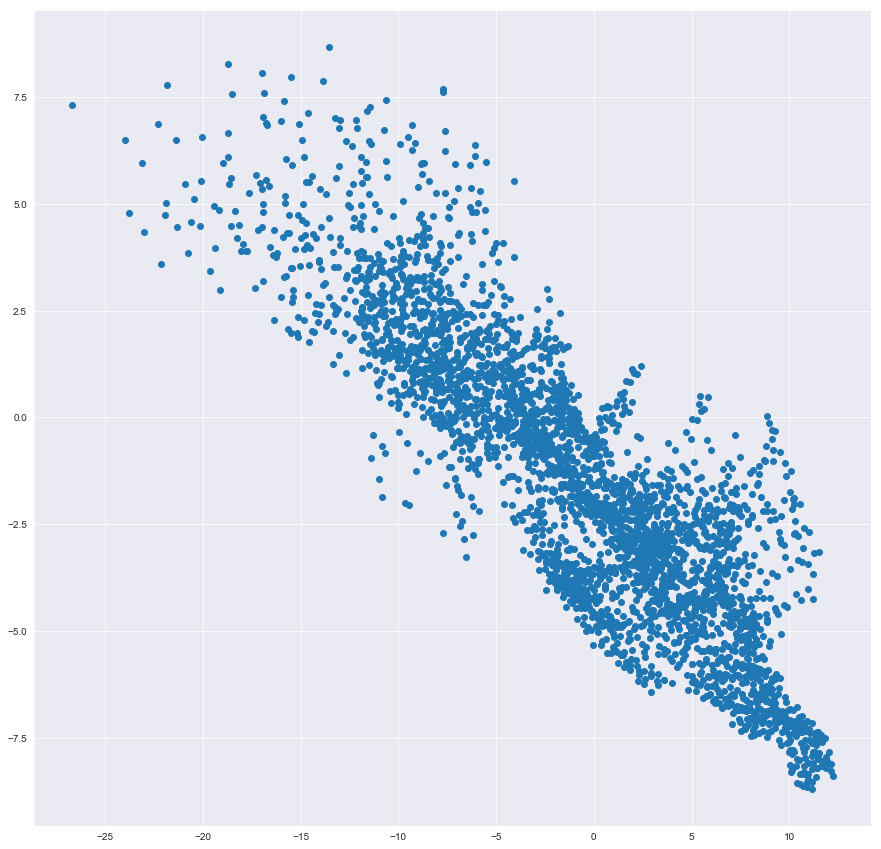

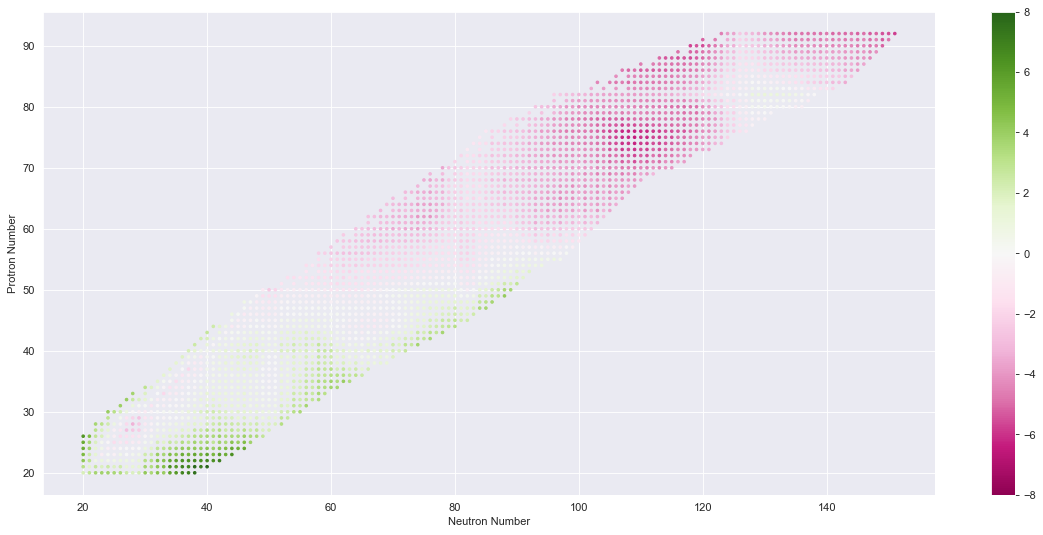

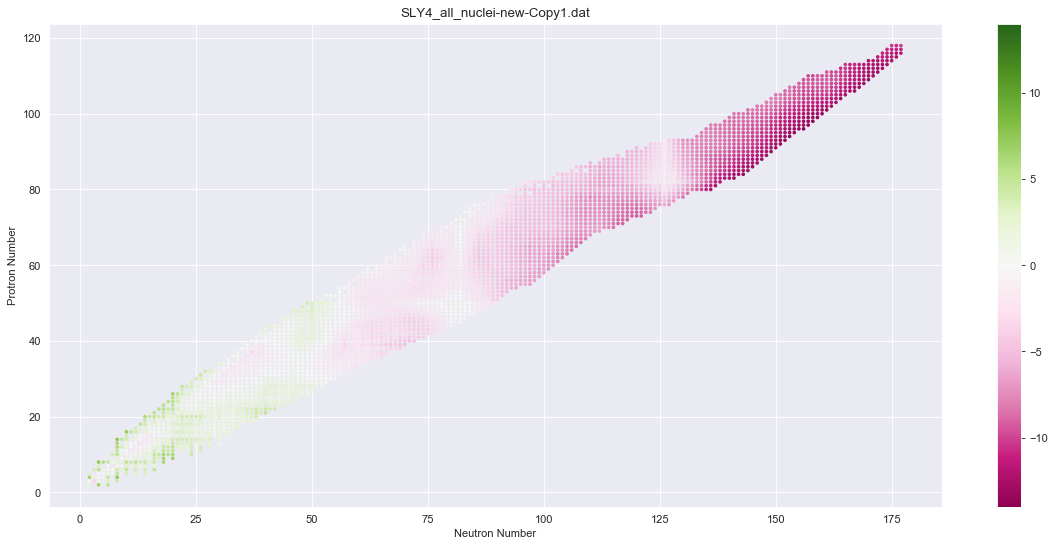

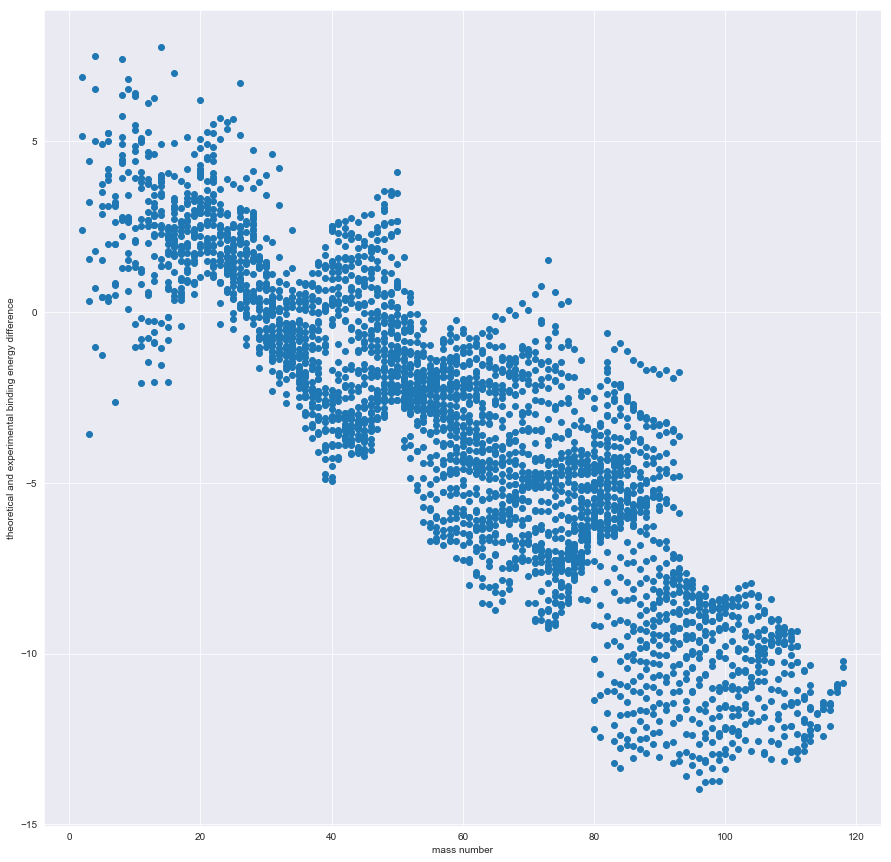

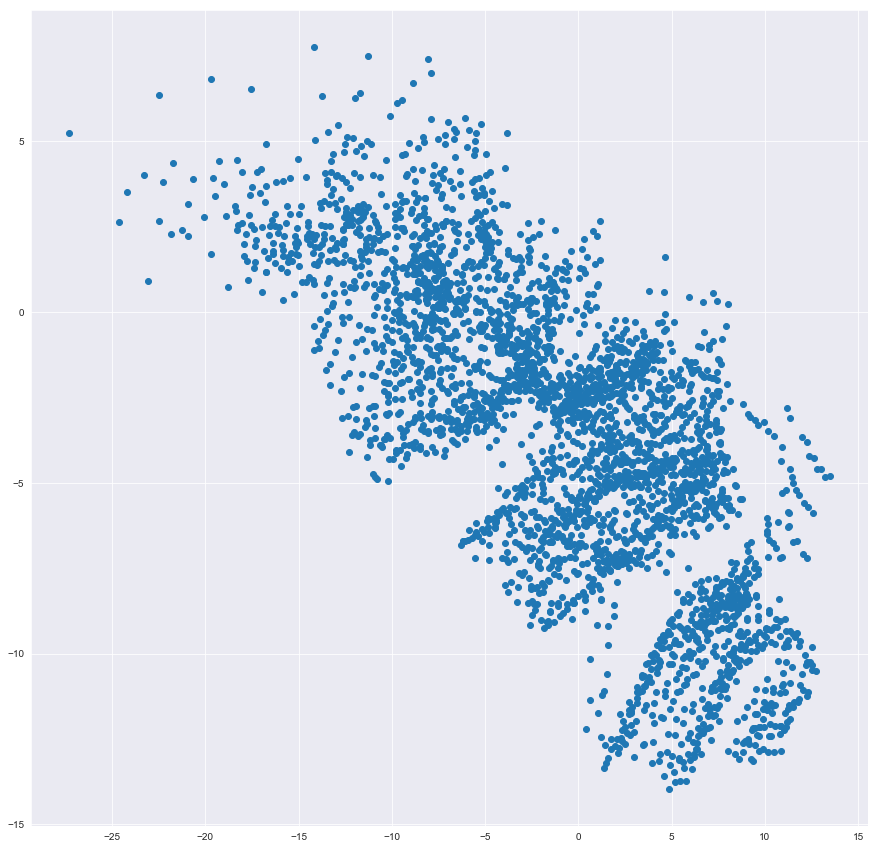

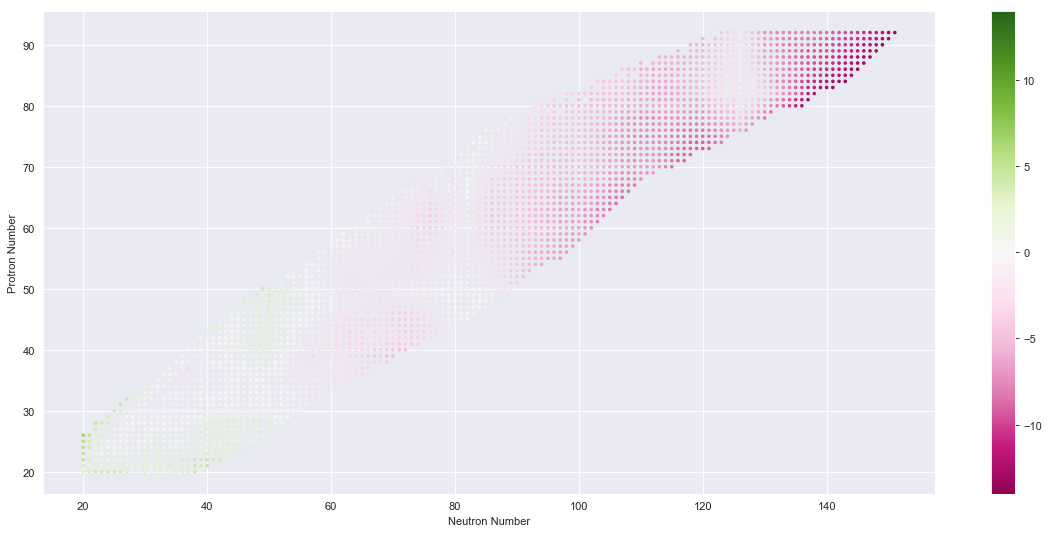

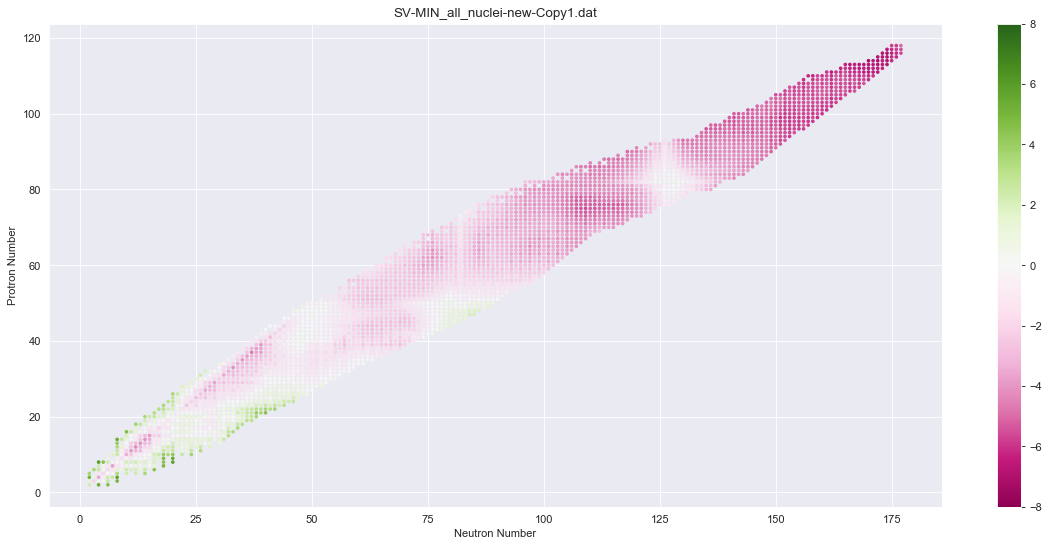

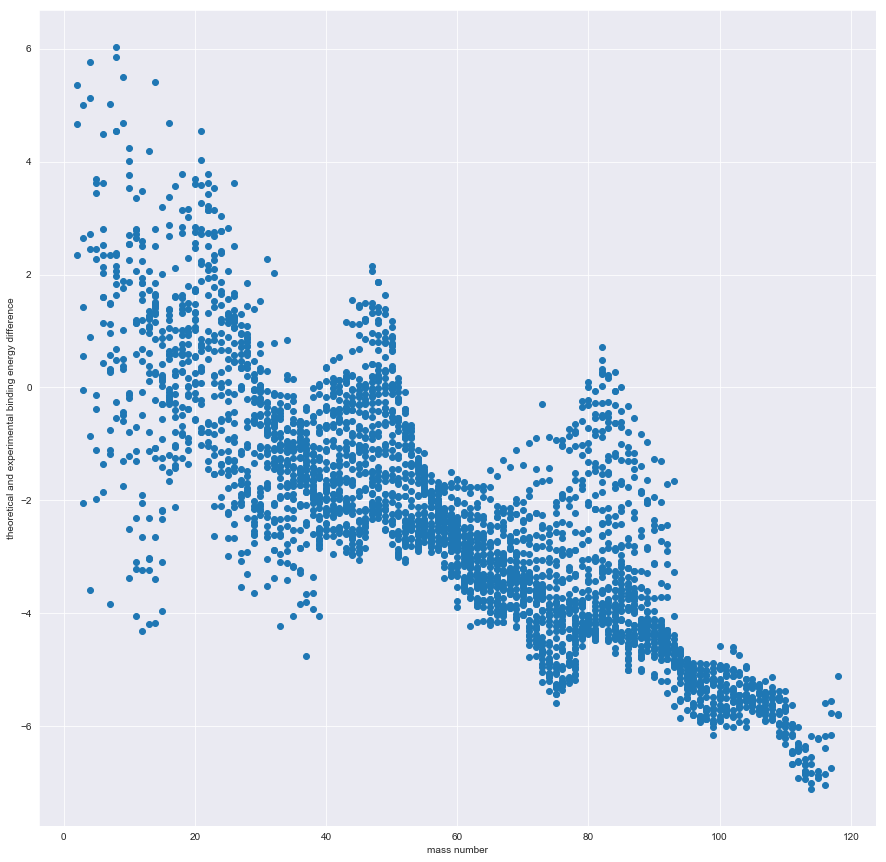

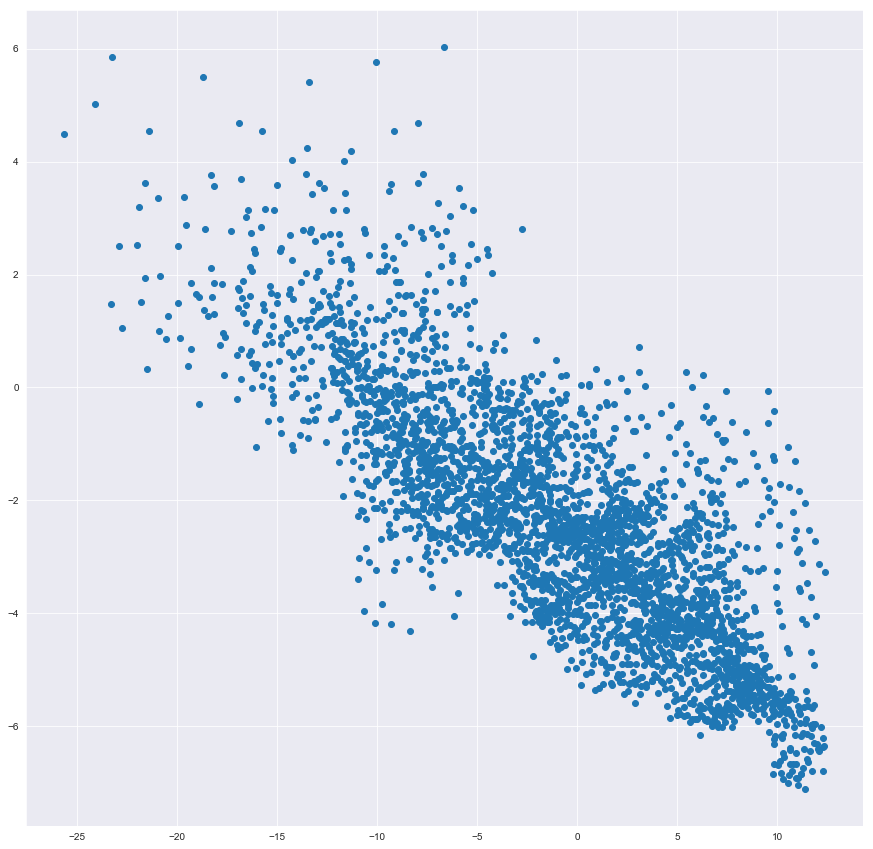

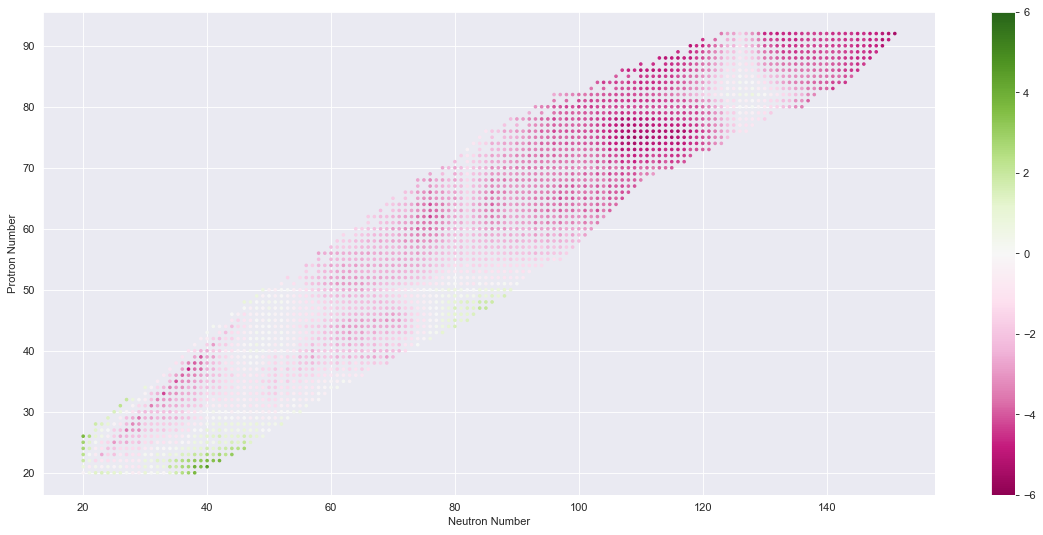

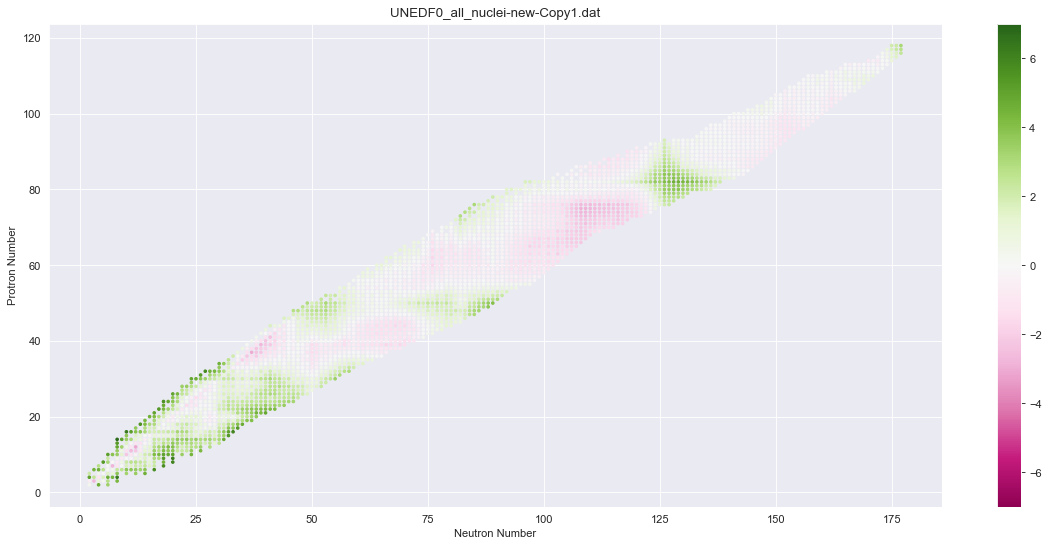

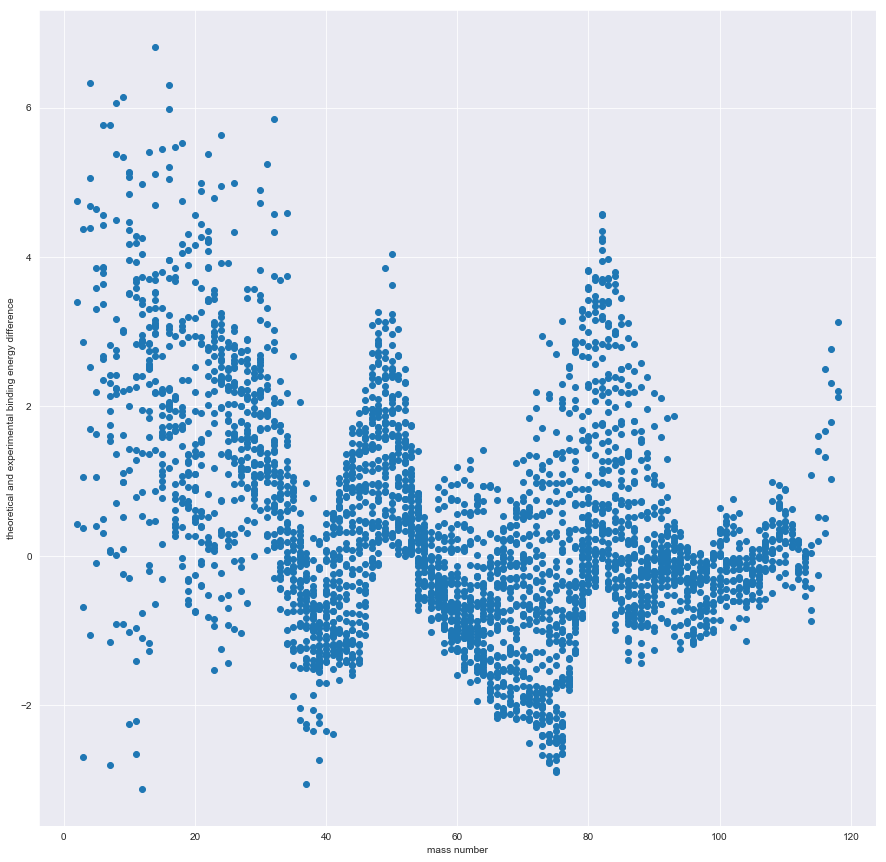

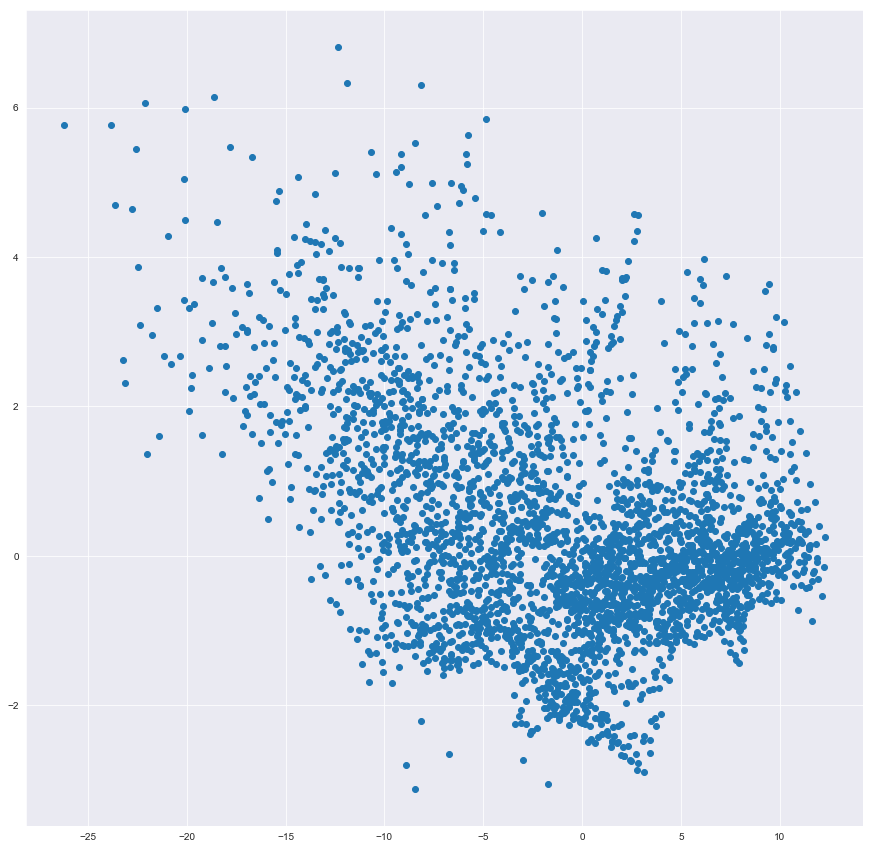

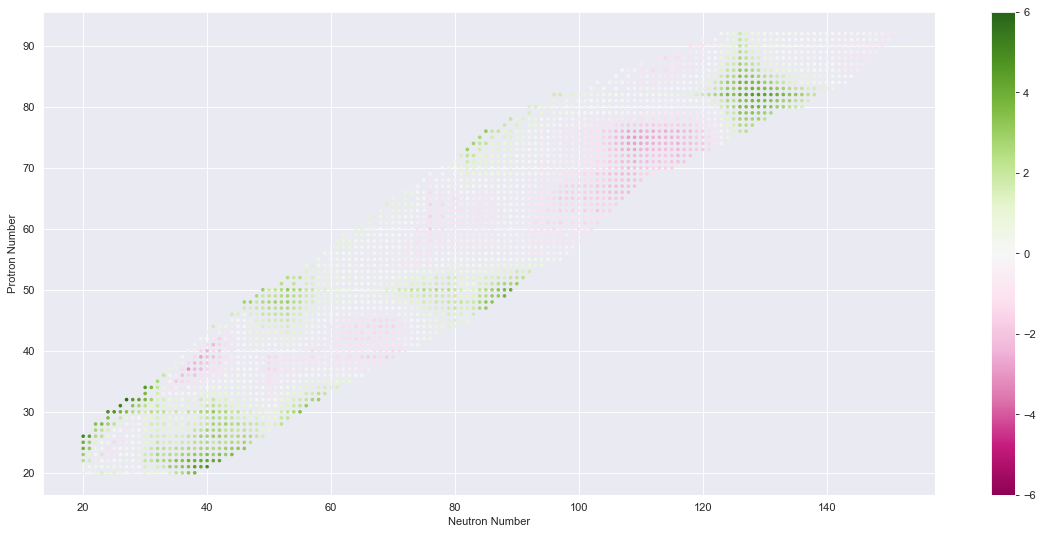

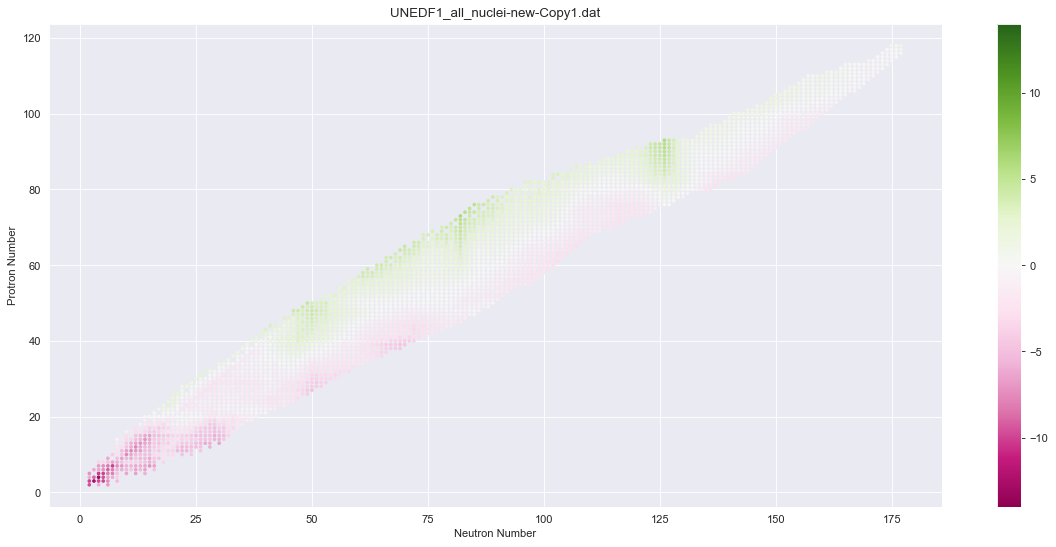

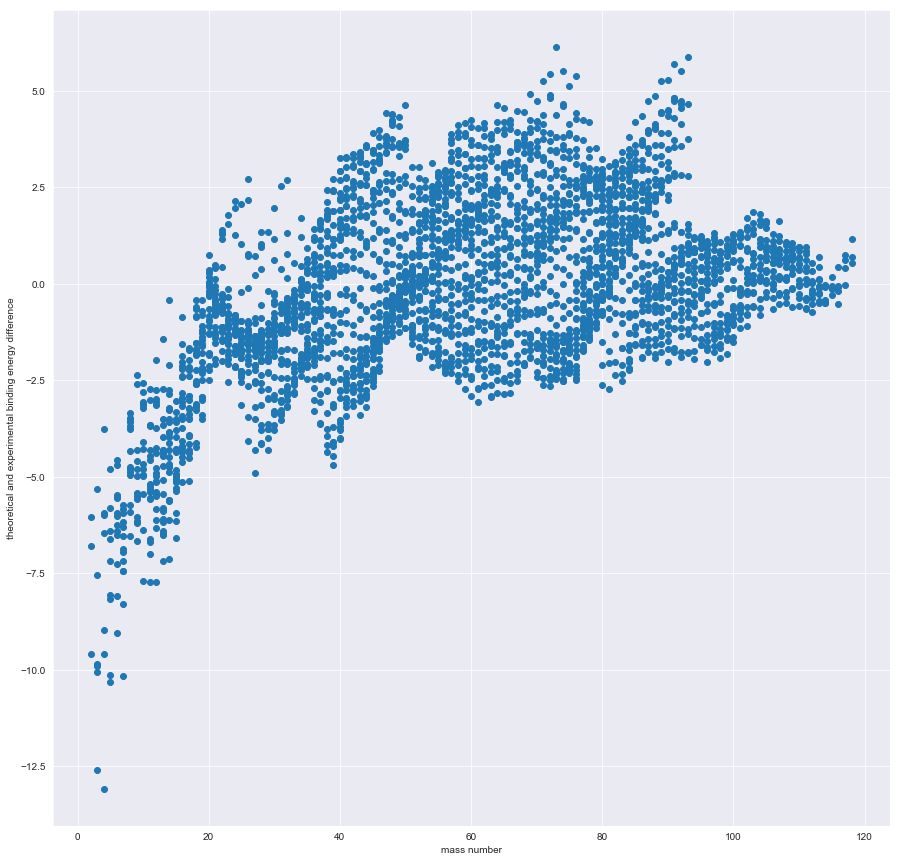

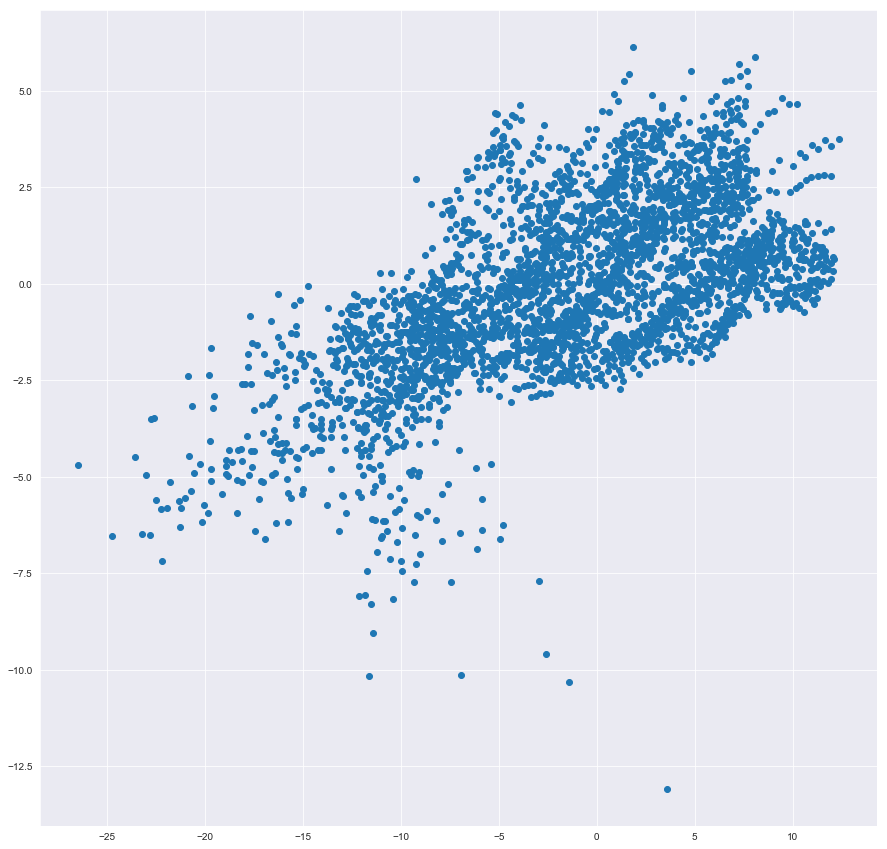

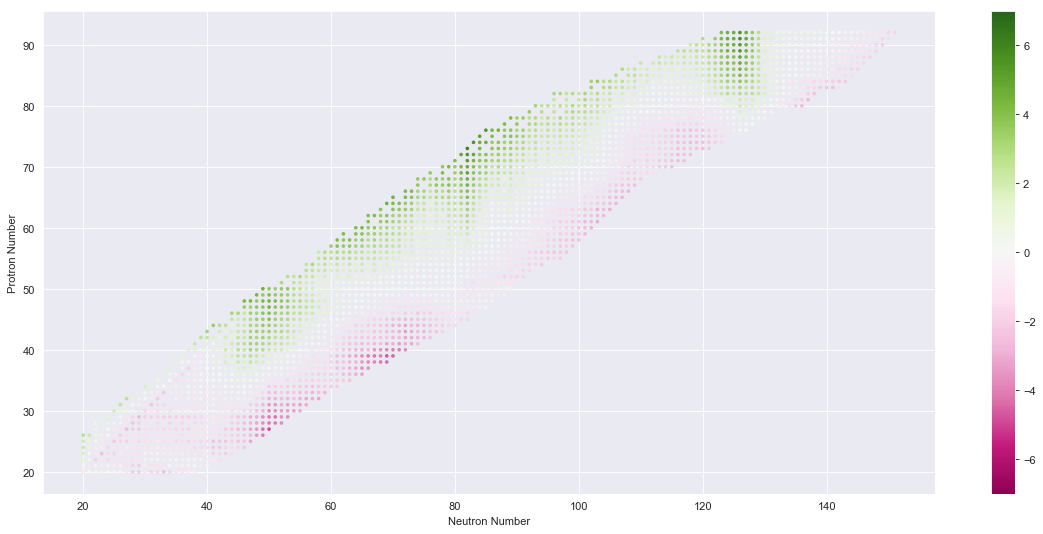

In [468]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#GRAPHS
#GRAPHS
#GRAPHS
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


for i in range(0,6):
    the_exp_mat_energies[i]=np.transpose(the_exp_mat_energies[i])
    the_exp_mat_range[i]=np.transpose(the_exp_mat_range[i])
    
    
    
    ext = np.int(np.ceil(max(-np.min(the_exp_mat_energies[i][4]),np.max(the_exp_mat_energies[i][4]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(the_exp_mat_energies[i][0],the_exp_mat_energies[i][1],c=the_exp_mat_energies[i][4],cmap='PiYG',vmin=-ext,vmax=ext,s=5)
    plt.title(the_names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.colorbar(sc)
    plt.show()
    
    
    plt.plot(the_exp_mat_energies[i][1], the_exp_mat_energies[i][4], 'o')
    plt.ylabel("theoretical and experimental binding energy difference")
    plt.xlabel("mass number")
    plt.show()
    
    plt.plot(the_exp_mat_energies[i][5],the_exp_mat_energies[i][4], 'o')
    plt.show()
    
    
    
    ext = np.int(np.ceil(max(-np.min(the_exp_mat_range[i][4]),np.max(the_exp_mat_range[i][4]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(the_exp_mat_range[i][0],the_exp_mat_range[i][1],c=the_exp_mat_range[i][4],cmap='PiYG',vmin=-ext,vmax=ext,s=5)
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.colorbar(sc)
    plt.show()
    
    
    print("\n\n\n\n")
    
    the_exp_mat_energies[i]=np.transpose(the_exp_mat_energies[i])
    the_exp_mat_range[i]=np.transpose(the_exp_mat_range[i])
    
    
    

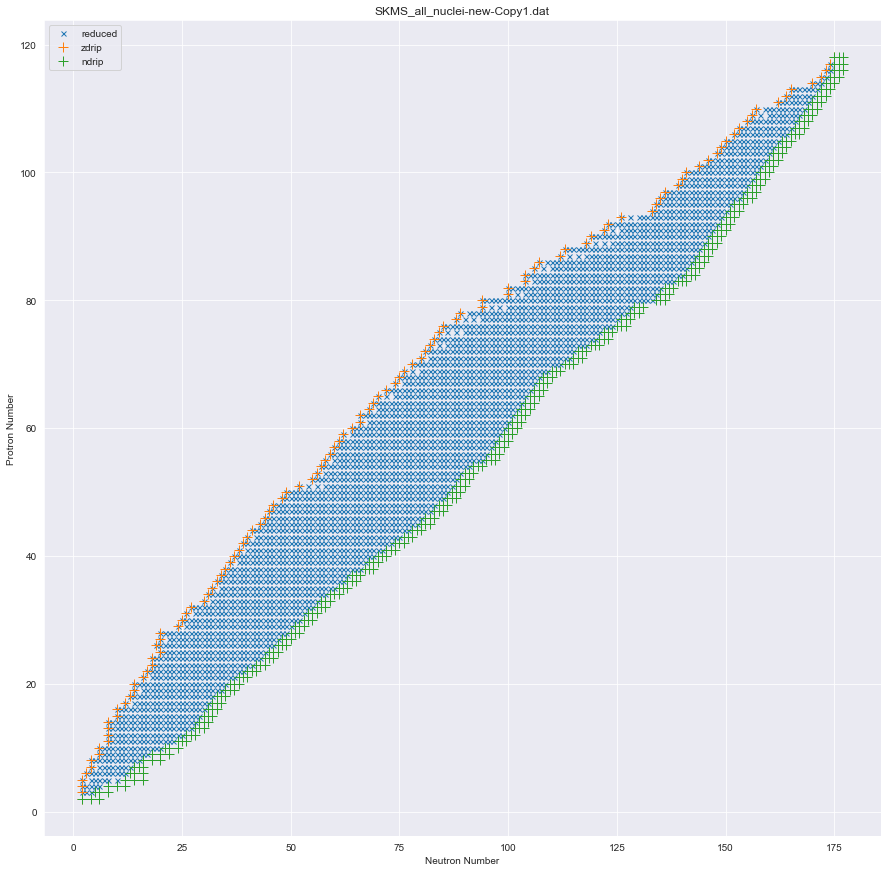

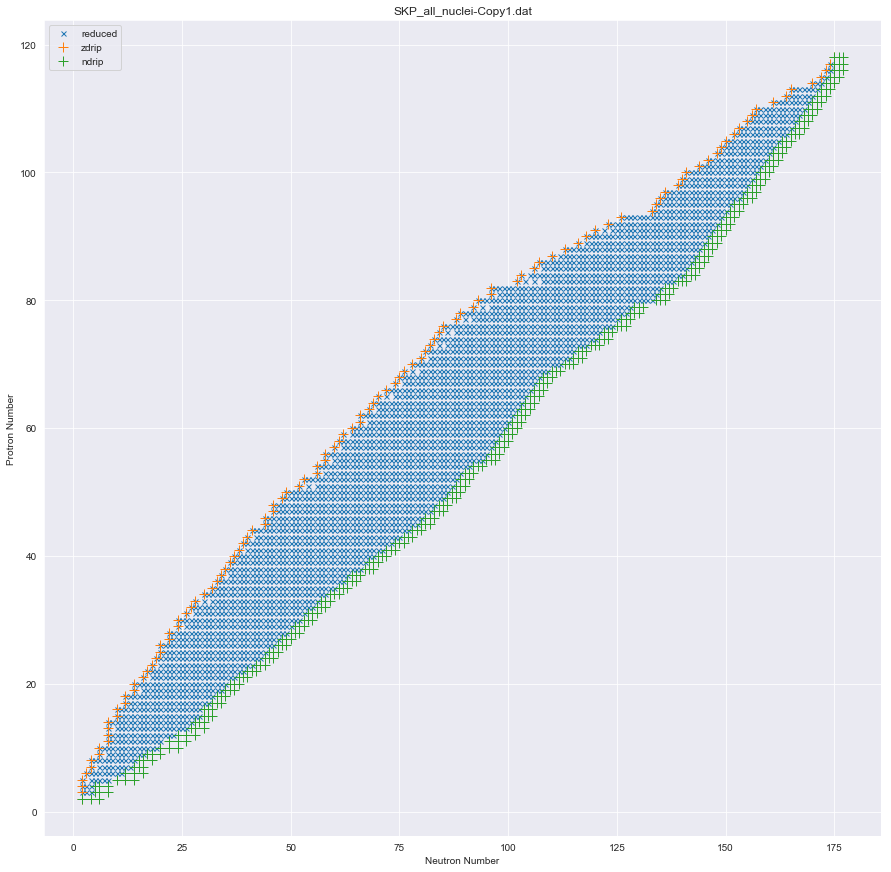

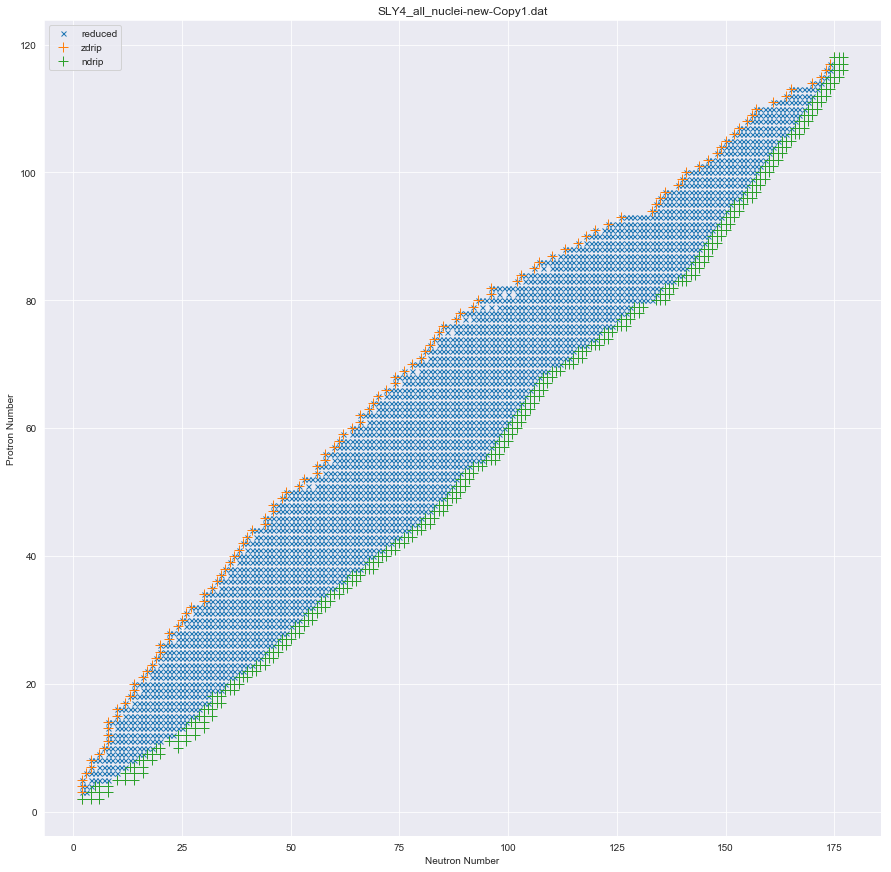

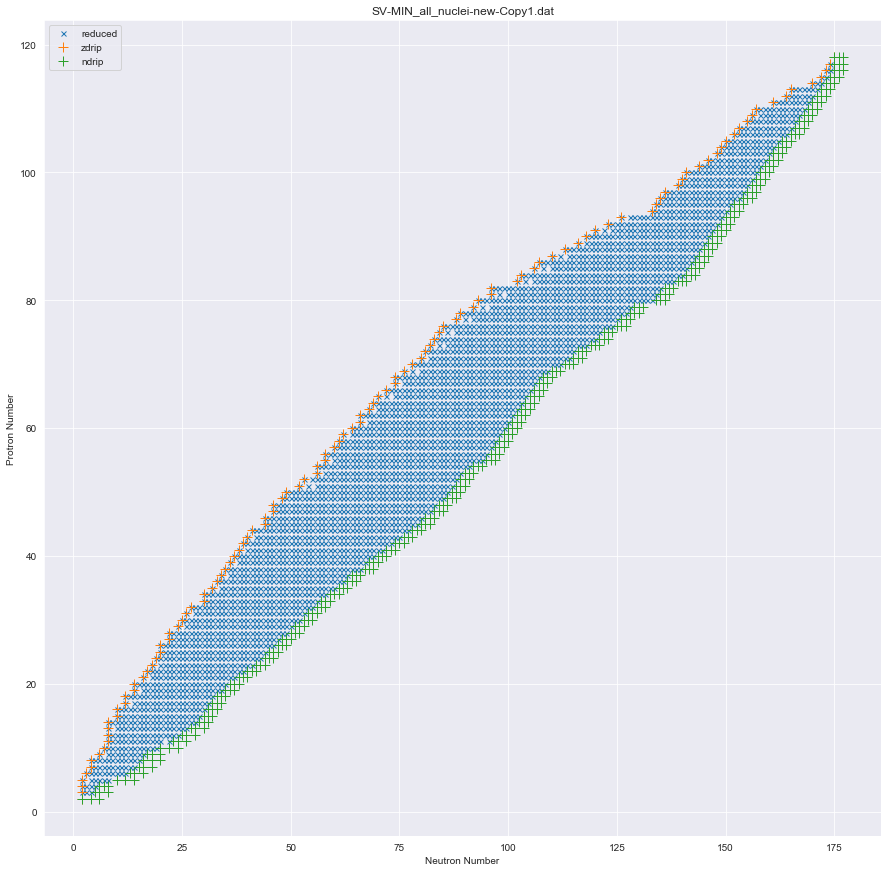

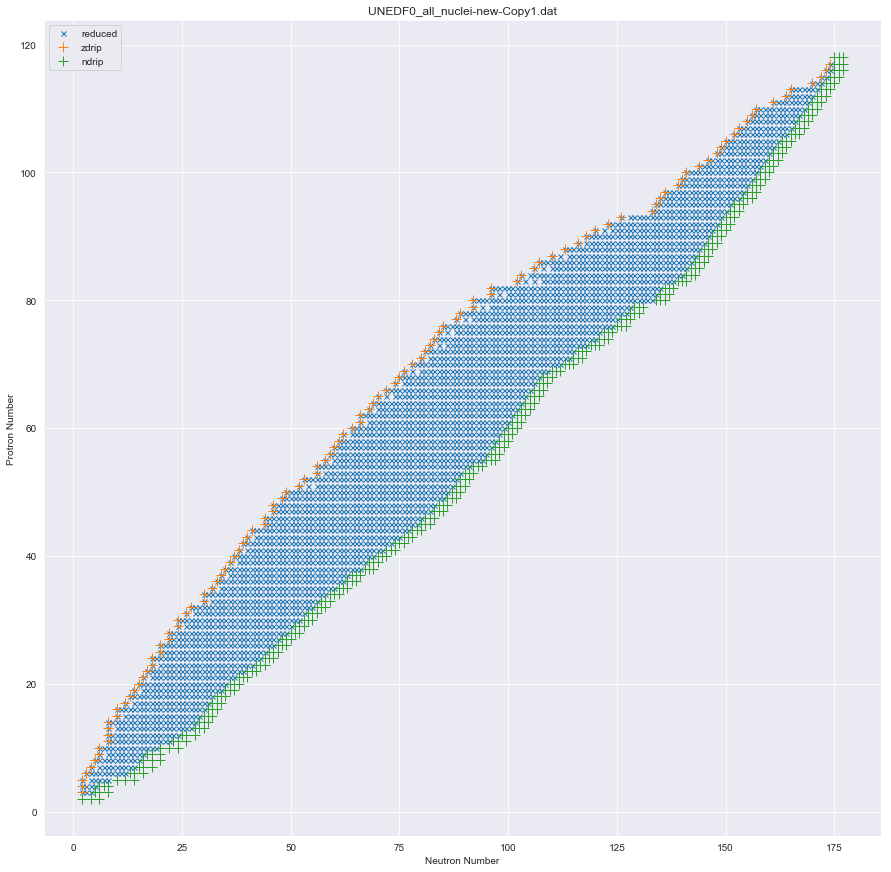

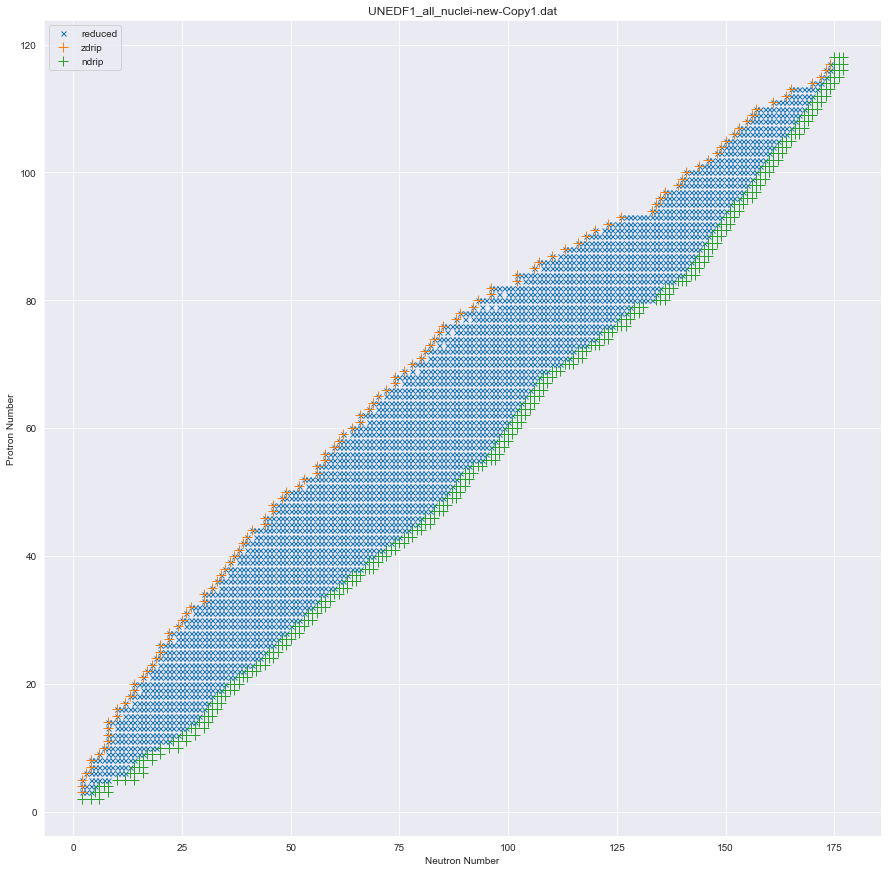

In [469]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#GRAPHS
#GRAPHS
#GRAPHS
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


for i in range(0,6):
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    zdrip_energies[i]=np.transpose(zdrip_energies[i])
    ndrip_energies[i]=np.transpose(ndrip_energies[i])
    the_exp_mat_energies[i]=np.transpose(the_exp_mat_energies[i]) 
    the_exp_mat_reduced_energies[i]=np.transpose(the_exp_mat_reduced_energies[i]) 
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  


for i in range(0,6):
    #plt.plot(the_exp_mat_energies[i][0],the_exp_mat_energies[i][1], "x", markersize=5, label='all')
    plt.plot(the_exp_mat_reduced_energies[i][0],the_exp_mat_reduced_energies[i][1], "x", markersize=5, label='reduced')
    
    plt.plot(zdrip_energies[i][0],zdrip_energies[i][1], "+", markersize=10, label='zdrip')
    plt.plot(ndrip_energies[i][0],ndrip_energies[i][1], "+", markersize=10, label='ndrip')
    
    
    
    plt.title(the_names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.grid(True)
    plt.legend()
    plt.show()

for i in range(0,6):
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    zdrip_energies[i]=np.transpose(zdrip_energies[i])
    ndrip_energies[i]=np.transpose(ndrip_energies[i])
    the_exp_mat_energies[i]=np.transpose(the_exp_mat_energies[i]) 
    the_exp_mat_reduced_energies[i]=np.transpose(the_exp_mat_reduced_energies[i]) 
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  
